In [1]:
# Plotar o gráfico com o filtro
# importing the required module 
import matplotlib.pyplot as plt

In [2]:
#Função que gera o filtro da média de tamanho n:
def filtro_media_n(n):
    filtro_h = list()
    for i in range(1, n+1):
        filtro_h.append(1/n)
    return filtro_h

In [3]:
#Gerando o filtro de média 5
m_5 = filtro_media_n(5)
print(m_5)

[0.2, 0.2, 0.2, 0.2, 0.2]


In [4]:
#Gerando o filtro de média 11
m_11 = filtro_media_n(11)
print(m_11)

[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


In [5]:
#Função para obter y1[n] = x[n]*m_5[n]
# x[n] é o sinal de entrada
# Tenho que proceder com o cálculo y[n] = somatório de h[k] * x[n - k], em k=0 até w
#y[0] = h[0]*x[0-0] + h[1]*x[0-1] + h[2]*x[0-2]
# Usando o espelhamento:
#y[0] = h[0]*[0] + h[1]*x[0] + h[2]*x[1]      se n-k < 0 entao espelho = (n-k)*(-1) - 1
#y[1] = h[0]*[1-0] + h[1]*x[1-1] + h[2]*x[1-2]
#y[2] = h[0]*x[2-0] + h[1]*x[2-1] + h[2]*x[2-2]

#se (n-k) > len(x) entao sobra = (n-k), espelho = len(x)-sobra+1 


# w é o número de coeficientes do filtro conhecido como suporte de h[].
# Numero de saidas = N + M - 1

In [6]:
# Retorna o número de sinais de entrada do arquivo txt e o vetor de entrada
def quant_lista_arquivo(nome_arquivo):
    with open(nome_arquivo, "r") as f:
        num_lines = 0
        vetor_entrada_sinais = list()
        for i, l in enumerate(f):
            # se não é uma linha em branco, adiciona na lista de sinais e conta o registro
            if l.strip():
                vetor_entrada_sinais.append(float(l.strip()))
                num_lines += 1
    return(num_lines, vetor_entrada_sinais)
    
quant_sinais, vetor_entrada_sinais = quant_lista_arquivo("dolar.txt")
print(vetor_entrada_sinais)
print(quant_sinais)


[4.2824, 4.2432, 4.2306, 4.1945, 4.2077, 4.1817, 4.1707, 4.1829, 4.2126, 4.1902, 4.162, 4.1851, 4.1756, 4.133, 4.1468, 4.0963, 4.0927, 4.0649, 4.0679, 4.0618, 4.0672, 4.0263, 4.0195, 4.0195, 4.0195, 4.046, 4.056, 4.0838, 4.0838, 4.0835, 4.1025, 4.0697, 4.0634, 4.0719, 4.0632, 4.1082, 4.0908, 4.1242, 4.147, 4.1425, 4.1414, 4.186, 4.208, 4.2066, 4.2234, 4.2367, 4.1902, 4.2638, 4.2332, 4.2268, 4.1966, 4.1932, 4.1965, 4.1945, 4.218, 4.1962, 4.1951, 4.1704, 4.1677, 4.1518, 4.1635, 4.1007, 4.0836, 3.9937, 4.0156, 3.9903, 4.0184, 3.9909, 3.9986, 3.991, 4.0038, 4.0415, 4.0346, 4.0819, 4.1293, 4.1117, 4.1643, 4.1518, 4.1807, 4.1265, 4.1097, 4.1095, 4.1104, 4.0954, 4.1071, 4.0556, 4.0841, 4.1293, 4.159, 4.1556, 4.1602, 4.1711, 4.149, 4.165, 4.1638, 4.148, 4.1678, 4.1112, 4.0777, 4.081, 4.0849, 4.0608, 4.068, 4.0808, 4.0953, 4.0618, 4.1094, 4.095, 4.1681, 4.1871, 4.1453, 4.1688, 4.1682, 4.1311, 4.1571, 4.1198, 4.0706, 4.0269, 4.0542, 4.0743, 4.0058, 3.991, 4.0526, 3.966, 3.9855, 3.9416, 3.9199, 3

In [7]:
# inverte a lista para ter uma evolução temporal, casos os dados estejam armazenados do mais recente para o mais antigo
# o dolar.txt, utilizado para este projeto, tem os dados armazenados desta forma citada.
vetor_entrada_sinais.reverse()
print(vetor_entrada_sinais)

[2.3621, 2.3876, 2.3765, 2.3761, 2.3725, 2.3967, 2.3904, 2.3584, 2.3598, 2.3503, 2.3605, 2.3636, 2.3426, 2.3442, 2.3575, 2.3731, 2.3959, 2.3982, 2.4215, 2.4263, 2.4352, 2.4118, 2.4127, 2.4402, 2.4055, 2.3986, 2.3825, 2.3802, 2.409, 2.4005, 2.4255, 2.3938, 2.3891, 2.39, 2.3955, 2.3942, 2.3704, 2.3456, 2.3392, 2.3411, 2.3497, 2.322, 2.3384, 2.3441, 2.3412, 2.3181, 2.3232, 2.3406, 2.3498, 2.3642, 2.3525, 2.3641, 2.3465, 2.3495, 2.3342, 2.3478, 2.3281, 2.3246, 2.3225, 2.3114, 2.3041, 2.2593, 2.2618, 2.2721, 2.2607, 2.2691, 2.2793, 2.236, 2.2189, 2.2012, 2.1856, 2.2067, 2.2184, 2.214, 2.2329, 2.2436, 2.2376, 2.2372, 2.237, 2.238, 2.2212, 2.2138, 2.2445, 2.2237, 2.2359, 2.233, 2.2335, 2.22, 2.2431, 2.2292, 2.2166, 2.2153, 2.2128, 2.2145, 2.2151, 2.2025, 2.2203, 2.2146, 2.2058, 2.2165, 2.2075, 2.2153, 2.2235, 2.2239, 2.2378, 2.2325, 2.2252, 2.2408, 2.2769, 2.2805, 2.2781, 2.2617, 2.2475, 2.2277, 2.2225, 2.2335, 2.23, 2.2241, 2.2343, 2.2618, 2.228, 2.2225, 2.2295, 2.218, 2.2252, 2.2078, 2.1969

In [8]:
# y[n] = h[k] * x[n - k]
# primeiro elemento de y: y[0]. Primeira amostra é a ultima
# y[0] = h[0] * x[0 - 0]
# y[0] = 0,2 * 4,2824

# Critério de parada. Dimensão de y
def dimensao_y_n(quant_sinais, filtro):
    dimensao_y_n = quant_sinais + len(filtro) - 1
    return dimensao_y_n

# Considerando o filtro m5
dim_y = dimensao_y_n(quant_sinais, m_5)


In [9]:
# Calcula a soma de cada interação no somatório da convolução (ainda não mostra a soma total)
# CRIAR E ESTRATÉGIA DE ESPELHAMENTO DOS SINAIS
def gera_dicionario_yn(sinais_entrada, filtro_h, dimensao_y):
    dicionario_y = dict()
    dimensao_filtro_h = len(filtro_h)
    dim_x = len(sinais_entrada)
    for n in range(dimensao_y):
        dicionario_y[n] = 0
        for k in range(dimensao_filtro_h):
            posicao_x = n - k
            
            if n - k < 0:
                posicao_negativa = n - k
                #espelhando o valor do negativo para o positivo
                #o primeiro valor negativo é espelhado no primeiro valor positivo e assim por diante, ou seja,
                #x[-1] = x[0], x[-2] = x[1]
                posicao_x = posicao_negativa*(-1) - 1 
                valor_posicao = sinais_entrada[posicao_x]
                print("Posição negativa:", posicao_negativa)
                print("Posicao espelhada:", posicao_x)
                print("Valor de x nessa posicao. x[{0}] = x[{1}] = {2}".format(posicao_negativa, posicao_x, valor_posicao))

            elif n - k >= dim_x:
                #posicao_transborda ocorre quando x[n-k] é maior que as posicoes do sinal de entrada x
                posicao_transborda = n - k
                quant_sobra = posicao_transborda - dim_x
                
                # para espelhar a posicao_x, o primeira valor que transborda len(x) + 1 é igual a
                # o ultimo valor possivel de x, x[len(x)], o segundo que transborda, len(x) + 2
                # é igual a x[len[x] - 1] e assim por diante.
                print(quant_sobra)
                posicao_x = dim_x - quant_sobra - 1
                print(posicao_x)
                valor_posicao = sinais_entrada[posicao_x]
                
                print("Posição que transbordou:", posicao_transborda)
                print("Posicao espelhada:", posicao_x)
                print("Valor de x nessa posicao. x[{0}] = x[{1}] = {2}".format(posicao_transborda, posicao_x, valor_posicao))
            else:
                valor_posicao = sinais_entrada[n-k]
                print("Nao transbordou pra nenhum lado. n-k = {} Vapor_posicao é igual {}".format(n-k, valor_posicao))
            
            dicionario_y[n] = dicionario_y[n] + (filtro_h[k] * valor_posicao)
#             try:
#                 valor_posicao = sinais_entrada[posicao_x]

#             except:
#                 valor_posicao = sin

    
    return dicionario_y
            
                

        
dicionario_y = gera_dicionario_yn(vetor_entrada_sinais, m_5, dim_y)
print(dicionario_y)
    

Nao transbordou pra nenhum lado. n-k = 0 Vapor_posicao é igual 2.3621
Posição negativa: -1
Posicao espelhada: 0
Valor de x nessa posicao. x[-1] = x[0] = 2.3621
Posição negativa: -2
Posicao espelhada: 1
Valor de x nessa posicao. x[-2] = x[1] = 2.3876
Posição negativa: -3
Posicao espelhada: 2
Valor de x nessa posicao. x[-3] = x[2] = 2.3765
Posição negativa: -4
Posicao espelhada: 3
Valor de x nessa posicao. x[-4] = x[3] = 2.3761
Nao transbordou pra nenhum lado. n-k = 1 Vapor_posicao é igual 2.3876
Nao transbordou pra nenhum lado. n-k = 0 Vapor_posicao é igual 2.3621
Posição negativa: -1
Posicao espelhada: 0
Valor de x nessa posicao. x[-1] = x[0] = 2.3621
Posição negativa: -2
Posicao espelhada: 1
Valor de x nessa posicao. x[-2] = x[1] = 2.3876
Posição negativa: -3
Posicao espelhada: 2
Valor de x nessa posicao. x[-3] = x[2] = 2.3765
Nao transbordou pra nenhum lado. n-k = 2 Vapor_posicao é igual 2.3765
Nao transbordou pra nenhum lado. n-k = 1 Vapor_posicao é igual 2.3876
Nao transbordou pra 

Nao transbordou pra nenhum lado. n-k = 27 Vapor_posicao é igual 2.3802
Nao transbordou pra nenhum lado. n-k = 26 Vapor_posicao é igual 2.3825
Nao transbordou pra nenhum lado. n-k = 25 Vapor_posicao é igual 2.3986
Nao transbordou pra nenhum lado. n-k = 30 Vapor_posicao é igual 2.4255
Nao transbordou pra nenhum lado. n-k = 29 Vapor_posicao é igual 2.4005
Nao transbordou pra nenhum lado. n-k = 28 Vapor_posicao é igual 2.409
Nao transbordou pra nenhum lado. n-k = 27 Vapor_posicao é igual 2.3802
Nao transbordou pra nenhum lado. n-k = 26 Vapor_posicao é igual 2.3825
Nao transbordou pra nenhum lado. n-k = 31 Vapor_posicao é igual 2.3938
Nao transbordou pra nenhum lado. n-k = 30 Vapor_posicao é igual 2.4255
Nao transbordou pra nenhum lado. n-k = 29 Vapor_posicao é igual 2.4005
Nao transbordou pra nenhum lado. n-k = 28 Vapor_posicao é igual 2.409
Nao transbordou pra nenhum lado. n-k = 27 Vapor_posicao é igual 2.3802
Nao transbordou pra nenhum lado. n-k = 32 Vapor_posicao é igual 2.3891
Nao tran

Nao transbordou pra nenhum lado. n-k = 51 Vapor_posicao é igual 2.3641
Nao transbordou pra nenhum lado. n-k = 50 Vapor_posicao é igual 2.3525
Nao transbordou pra nenhum lado. n-k = 55 Vapor_posicao é igual 2.3478
Nao transbordou pra nenhum lado. n-k = 54 Vapor_posicao é igual 2.3342
Nao transbordou pra nenhum lado. n-k = 53 Vapor_posicao é igual 2.3495
Nao transbordou pra nenhum lado. n-k = 52 Vapor_posicao é igual 2.3465
Nao transbordou pra nenhum lado. n-k = 51 Vapor_posicao é igual 2.3641
Nao transbordou pra nenhum lado. n-k = 56 Vapor_posicao é igual 2.3281
Nao transbordou pra nenhum lado. n-k = 55 Vapor_posicao é igual 2.3478
Nao transbordou pra nenhum lado. n-k = 54 Vapor_posicao é igual 2.3342
Nao transbordou pra nenhum lado. n-k = 53 Vapor_posicao é igual 2.3495
Nao transbordou pra nenhum lado. n-k = 52 Vapor_posicao é igual 2.3465
Nao transbordou pra nenhum lado. n-k = 57 Vapor_posicao é igual 2.3246
Nao transbordou pra nenhum lado. n-k = 56 Vapor_posicao é igual 2.3281
Nao tr

Nao transbordou pra nenhum lado. n-k = 170 Vapor_posicao é igual 2.2471
Nao transbordou pra nenhum lado. n-k = 175 Vapor_posicao é igual 2.237
Nao transbordou pra nenhum lado. n-k = 174 Vapor_posicao é igual 2.2435
Nao transbordou pra nenhum lado. n-k = 173 Vapor_posicao é igual 2.2458
Nao transbordou pra nenhum lado. n-k = 172 Vapor_posicao é igual 2.236
Nao transbordou pra nenhum lado. n-k = 171 Vapor_posicao é igual 2.2415
Nao transbordou pra nenhum lado. n-k = 176 Vapor_posicao é igual 2.2431
Nao transbordou pra nenhum lado. n-k = 175 Vapor_posicao é igual 2.237
Nao transbordou pra nenhum lado. n-k = 174 Vapor_posicao é igual 2.2435
Nao transbordou pra nenhum lado. n-k = 173 Vapor_posicao é igual 2.2458
Nao transbordou pra nenhum lado. n-k = 172 Vapor_posicao é igual 2.236
Nao transbordou pra nenhum lado. n-k = 177 Vapor_posicao é igual 2.2405
Nao transbordou pra nenhum lado. n-k = 176 Vapor_posicao é igual 2.2431
Nao transbordou pra nenhum lado. n-k = 175 Vapor_posicao é igual 2.2

Nao transbordou pra nenhum lado. n-k = 234 Vapor_posicao é igual 2.5303
Nao transbordou pra nenhum lado. n-k = 233 Vapor_posicao é igual 2.5457
Nao transbordou pra nenhum lado. n-k = 232 Vapor_posicao é igual 2.5153
Nao transbordou pra nenhum lado. n-k = 231 Vapor_posicao é igual 2.5731
Nao transbordou pra nenhum lado. n-k = 230 Vapor_posicao é igual 2.572
Nao transbordou pra nenhum lado. n-k = 235 Vapor_posicao é igual 2.5011
Nao transbordou pra nenhum lado. n-k = 234 Vapor_posicao é igual 2.5303
Nao transbordou pra nenhum lado. n-k = 233 Vapor_posicao é igual 2.5457
Nao transbordou pra nenhum lado. n-k = 232 Vapor_posicao é igual 2.5153
Nao transbordou pra nenhum lado. n-k = 231 Vapor_posicao é igual 2.5731
Nao transbordou pra nenhum lado. n-k = 236 Vapor_posicao é igual 2.5304
Nao transbordou pra nenhum lado. n-k = 235 Vapor_posicao é igual 2.5011
Nao transbordou pra nenhum lado. n-k = 234 Vapor_posicao é igual 2.5303
Nao transbordou pra nenhum lado. n-k = 233 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 285 Vapor_posicao é igual 2.7418
Nao transbordou pra nenhum lado. n-k = 284 Vapor_posicao é igual 2.6945
Nao transbordou pra nenhum lado. n-k = 283 Vapor_posicao é igual 2.7271
Nao transbordou pra nenhum lado. n-k = 288 Vapor_posicao é igual 2.7698
Nao transbordou pra nenhum lado. n-k = 287 Vapor_posicao é igual 2.7825
Nao transbordou pra nenhum lado. n-k = 286 Vapor_posicao é igual 2.7451
Nao transbordou pra nenhum lado. n-k = 285 Vapor_posicao é igual 2.7418
Nao transbordou pra nenhum lado. n-k = 284 Vapor_posicao é igual 2.6945
Nao transbordou pra nenhum lado. n-k = 289 Vapor_posicao é igual 2.8343
Nao transbordou pra nenhum lado. n-k = 288 Vapor_posicao é igual 2.7698
Nao transbordou pra nenhum lado. n-k = 287 Vapor_posicao é igual 2.7825
Nao transbordou pra nenhum lado. n-k = 286 Vapor_posicao é igual 2.7451
Nao transbordou pra nenhum lado. n-k = 285 Vapor_posicao é igual 2.7418
Nao transbordou pra nenhum lado. n-k = 290 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 334 Vapor_posicao é igual 3.0634
Nao transbordou pra nenhum lado. n-k = 333 Vapor_posicao é igual 3.1212
Nao transbordou pra nenhum lado. n-k = 332 Vapor_posicao é igual 3.0756
Nao transbordou pra nenhum lado. n-k = 331 Vapor_posicao é igual 3.0591
Nao transbordou pra nenhum lado. n-k = 330 Vapor_posicao é igual 3.0495
Nao transbordou pra nenhum lado. n-k = 335 Vapor_posicao é igual 3.0294
Nao transbordou pra nenhum lado. n-k = 334 Vapor_posicao é igual 3.0634
Nao transbordou pra nenhum lado. n-k = 333 Vapor_posicao é igual 3.1212
Nao transbordou pra nenhum lado. n-k = 332 Vapor_posicao é igual 3.0756
Nao transbordou pra nenhum lado. n-k = 331 Vapor_posicao é igual 3.0591
Nao transbordou pra nenhum lado. n-k = 336 Vapor_posicao é igual 3.0221
Nao transbordou pra nenhum lado. n-k = 335 Vapor_posicao é igual 3.0294
Nao transbordou pra nenhum lado. n-k = 334 Vapor_posicao é igual 3.0634
Nao transbordou pra nenhum lado. n-k = 333 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 360 Vapor_posicao é igual 3.0027
Nao transbordou pra nenhum lado. n-k = 359 Vapor_posicao é igual 3.0394
Nao transbordou pra nenhum lado. n-k = 358 Vapor_posicao é igual 3.0076
Nao transbordou pra nenhum lado. n-k = 363 Vapor_posicao é igual 3.0968
Nao transbordou pra nenhum lado. n-k = 362 Vapor_posicao é igual 3.0949
Nao transbordou pra nenhum lado. n-k = 361 Vapor_posicao é igual 3.0379
Nao transbordou pra nenhum lado. n-k = 360 Vapor_posicao é igual 3.0027
Nao transbordou pra nenhum lado. n-k = 359 Vapor_posicao é igual 3.0394
Nao transbordou pra nenhum lado. n-k = 364 Vapor_posicao é igual 3.1536
Nao transbordou pra nenhum lado. n-k = 363 Vapor_posicao é igual 3.0968
Nao transbordou pra nenhum lado. n-k = 362 Vapor_posicao é igual 3.0949
Nao transbordou pra nenhum lado. n-k = 361 Vapor_posicao é igual 3.0379
Nao transbordou pra nenhum lado. n-k = 360 Vapor_posicao é igual 3.0027
Nao transbordou pra nenhum lado. n-k = 365 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 403 Vapor_posicao é igual 3.1981
Nao transbordou pra nenhum lado. n-k = 402 Vapor_posicao é igual 3.1881
Nao transbordou pra nenhum lado. n-k = 401 Vapor_posicao é igual 3.1587
Nao transbordou pra nenhum lado. n-k = 406 Vapor_posicao é igual 3.286
Nao transbordou pra nenhum lado. n-k = 405 Vapor_posicao é igual 3.2239
Nao transbordou pra nenhum lado. n-k = 404 Vapor_posicao é igual 3.1717
Nao transbordou pra nenhum lado. n-k = 403 Vapor_posicao é igual 3.1981
Nao transbordou pra nenhum lado. n-k = 402 Vapor_posicao é igual 3.1881
Nao transbordou pra nenhum lado. n-k = 407 Vapor_posicao é igual 3.3556
Nao transbordou pra nenhum lado. n-k = 406 Vapor_posicao é igual 3.286
Nao transbordou pra nenhum lado. n-k = 405 Vapor_posicao é igual 3.2239
Nao transbordou pra nenhum lado. n-k = 404 Vapor_posicao é igual 3.1717
Nao transbordou pra nenhum lado. n-k = 403 Vapor_posicao é igual 3.1981
Nao transbordou pra nenhum lado. n-k = 408 Vapor_posicao é igual 3

Nao transbordou pra nenhum lado. n-k = 445 Vapor_posicao é igual 3.8289
Nao transbordou pra nenhum lado. n-k = 444 Vapor_posicao é igual 3.8634
Nao transbordou pra nenhum lado. n-k = 443 Vapor_posicao é igual 3.815
Nao transbordou pra nenhum lado. n-k = 442 Vapor_posicao é igual 3.8705
Nao transbordou pra nenhum lado. n-k = 441 Vapor_posicao é igual 3.8498
Nao transbordou pra nenhum lado. n-k = 446 Vapor_posicao é igual 3.899
Nao transbordou pra nenhum lado. n-k = 445 Vapor_posicao é igual 3.8289
Nao transbordou pra nenhum lado. n-k = 444 Vapor_posicao é igual 3.8634
Nao transbordou pra nenhum lado. n-k = 443 Vapor_posicao é igual 3.815
Nao transbordou pra nenhum lado. n-k = 442 Vapor_posicao é igual 3.8705
Nao transbordou pra nenhum lado. n-k = 447 Vapor_posicao é igual 3.9459
Nao transbordou pra nenhum lado. n-k = 446 Vapor_posicao é igual 3.899
Nao transbordou pra nenhum lado. n-k = 445 Vapor_posicao é igual 3.8289
Nao transbordou pra nenhum lado. n-k = 444 Vapor_posicao é igual 3.8

Nao transbordou pra nenhum lado. n-k = 473 Vapor_posicao é igual 3.906
Nao transbordou pra nenhum lado. n-k = 472 Vapor_posicao é igual 3.8807
Nao transbordou pra nenhum lado. n-k = 471 Vapor_posicao é igual 3.9088
Nao transbordou pra nenhum lado. n-k = 476 Vapor_posicao é igual 3.8509
Nao transbordou pra nenhum lado. n-k = 475 Vapor_posicao é igual 3.9094
Nao transbordou pra nenhum lado. n-k = 474 Vapor_posicao é igual 3.8883
Nao transbordou pra nenhum lado. n-k = 473 Vapor_posicao é igual 3.906
Nao transbordou pra nenhum lado. n-k = 472 Vapor_posicao é igual 3.8807
Nao transbordou pra nenhum lado. n-k = 477 Vapor_posicao é igual 3.8564
Nao transbordou pra nenhum lado. n-k = 476 Vapor_posicao é igual 3.8509
Nao transbordou pra nenhum lado. n-k = 475 Vapor_posicao é igual 3.9094
Nao transbordou pra nenhum lado. n-k = 474 Vapor_posicao é igual 3.8883
Nao transbordou pra nenhum lado. n-k = 473 Vapor_posicao é igual 3.906
Nao transbordou pra nenhum lado. n-k = 478 Vapor_posicao é igual 3.

Nao transbordou pra nenhum lado. n-k = 507 Vapor_posicao é igual 3.873
Nao transbordou pra nenhum lado. n-k = 512 Vapor_posicao é igual 3.9824
Nao transbordou pra nenhum lado. n-k = 511 Vapor_posicao é igual 3.8796
Nao transbordou pra nenhum lado. n-k = 510 Vapor_posicao é igual 3.8848
Nao transbordou pra nenhum lado. n-k = 509 Vapor_posicao é igual 3.873
Nao transbordou pra nenhum lado. n-k = 508 Vapor_posicao é igual 3.8779
Nao transbordou pra nenhum lado. n-k = 513 Vapor_posicao é igual 4.0134
Nao transbordou pra nenhum lado. n-k = 512 Vapor_posicao é igual 3.9824
Nao transbordou pra nenhum lado. n-k = 511 Vapor_posicao é igual 3.8796
Nao transbordou pra nenhum lado. n-k = 510 Vapor_posicao é igual 3.8848
Nao transbordou pra nenhum lado. n-k = 509 Vapor_posicao é igual 3.873
Nao transbordou pra nenhum lado. n-k = 514 Vapor_posicao é igual 3.9899
Nao transbordou pra nenhum lado. n-k = 513 Vapor_posicao é igual 4.0134
Nao transbordou pra nenhum lado. n-k = 512 Vapor_posicao é igual 3.

Nao transbordou pra nenhum lado. n-k = 541 Vapor_posicao é igual 4.0699
Nao transbordou pra nenhum lado. n-k = 540 Vapor_posicao é igual 4.1077
Nao transbordou pra nenhum lado. n-k = 539 Vapor_posicao é igual 4.0536
Nao transbordou pra nenhum lado. n-k = 544 Vapor_posicao é igual 3.9895
Nao transbordou pra nenhum lado. n-k = 543 Vapor_posicao é igual 3.9629
Nao transbordou pra nenhum lado. n-k = 542 Vapor_posicao é igual 3.9988
Nao transbordou pra nenhum lado. n-k = 541 Vapor_posicao é igual 4.0699
Nao transbordou pra nenhum lado. n-k = 540 Vapor_posicao é igual 4.1077
Nao transbordou pra nenhum lado. n-k = 545 Vapor_posicao é igual 3.8954
Nao transbordou pra nenhum lado. n-k = 544 Vapor_posicao é igual 3.9895
Nao transbordou pra nenhum lado. n-k = 543 Vapor_posicao é igual 3.9629
Nao transbordou pra nenhum lado. n-k = 542 Vapor_posicao é igual 3.9988
Nao transbordou pra nenhum lado. n-k = 541 Vapor_posicao é igual 4.0699
Nao transbordou pra nenhum lado. n-k = 546 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 577 Vapor_posicao é igual 3.624
Nao transbordou pra nenhum lado. n-k = 576 Vapor_posicao é igual 3.6267
Nao transbordou pra nenhum lado. n-k = 581 Vapor_posicao é igual 3.6771
Nao transbordou pra nenhum lado. n-k = 580 Vapor_posicao é igual 3.6854
Nao transbordou pra nenhum lado. n-k = 579 Vapor_posicao é igual 3.5812
Nao transbordou pra nenhum lado. n-k = 578 Vapor_posicao é igual 3.6178
Nao transbordou pra nenhum lado. n-k = 577 Vapor_posicao é igual 3.624
Nao transbordou pra nenhum lado. n-k = 582 Vapor_posicao é igual 3.6835
Nao transbordou pra nenhum lado. n-k = 581 Vapor_posicao é igual 3.6771
Nao transbordou pra nenhum lado. n-k = 580 Vapor_posicao é igual 3.6854
Nao transbordou pra nenhum lado. n-k = 579 Vapor_posicao é igual 3.5812
Nao transbordou pra nenhum lado. n-k = 578 Vapor_posicao é igual 3.6178
Nao transbordou pra nenhum lado. n-k = 583 Vapor_posicao é igual 3.6278
Nao transbordou pra nenhum lado. n-k = 582 Vapor_posicao é igual 3

Nao transbordou pra nenhum lado. n-k = 601 Vapor_posicao é igual 3.5386
Nao transbordou pra nenhum lado. n-k = 606 Vapor_posicao é igual 3.4878
Nao transbordou pra nenhum lado. n-k = 605 Vapor_posicao é igual 3.5267
Nao transbordou pra nenhum lado. n-k = 604 Vapor_posicao é igual 3.5297
Nao transbordou pra nenhum lado. n-k = 603 Vapor_posicao é igual 3.5558
Nao transbordou pra nenhum lado. n-k = 602 Vapor_posicao é igual 3.5646
Nao transbordou pra nenhum lado. n-k = 607 Vapor_posicao é igual 3.4358
Nao transbordou pra nenhum lado. n-k = 606 Vapor_posicao é igual 3.4878
Nao transbordou pra nenhum lado. n-k = 605 Vapor_posicao é igual 3.5267
Nao transbordou pra nenhum lado. n-k = 604 Vapor_posicao é igual 3.5297
Nao transbordou pra nenhum lado. n-k = 603 Vapor_posicao é igual 3.5558
Nao transbordou pra nenhum lado. n-k = 608 Vapor_posicao é igual 3.5011
Nao transbordou pra nenhum lado. n-k = 607 Vapor_posicao é igual 3.4358
Nao transbordou pra nenhum lado. n-k = 606 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 633 Vapor_posicao é igual 3.4896
Nao transbordou pra nenhum lado. n-k = 632 Vapor_posicao é igual 3.524
Nao transbordou pra nenhum lado. n-k = 631 Vapor_posicao é igual 3.5926
Nao transbordou pra nenhum lado. n-k = 636 Vapor_posicao é igual 3.401
Nao transbordou pra nenhum lado. n-k = 635 Vapor_posicao é igual 3.363
Nao transbordou pra nenhum lado. n-k = 634 Vapor_posicao é igual 3.4421
Nao transbordou pra nenhum lado. n-k = 633 Vapor_posicao é igual 3.4896
Nao transbordou pra nenhum lado. n-k = 632 Vapor_posicao é igual 3.524
Nao transbordou pra nenhum lado. n-k = 637 Vapor_posicao é igual 3.4188
Nao transbordou pra nenhum lado. n-k = 636 Vapor_posicao é igual 3.401
Nao transbordou pra nenhum lado. n-k = 635 Vapor_posicao é igual 3.363
Nao transbordou pra nenhum lado. n-k = 634 Vapor_posicao é igual 3.4421
Nao transbordou pra nenhum lado. n-k = 633 Vapor_posicao é igual 3.4896
Nao transbordou pra nenhum lado. n-k = 638 Vapor_posicao é igual 3.482

Nao transbordou pra nenhum lado. n-k = 660 Vapor_posicao é igual 3.2637
Nao transbordou pra nenhum lado. n-k = 659 Vapor_posicao é igual 3.296
Nao transbordou pra nenhum lado. n-k = 664 Vapor_posicao é igual 3.249
Nao transbordou pra nenhum lado. n-k = 663 Vapor_posicao é igual 3.2532
Nao transbordou pra nenhum lado. n-k = 662 Vapor_posicao é igual 3.282
Nao transbordou pra nenhum lado. n-k = 661 Vapor_posicao é igual 3.2511
Nao transbordou pra nenhum lado. n-k = 660 Vapor_posicao é igual 3.2637
Nao transbordou pra nenhum lado. n-k = 665 Vapor_posicao é igual 3.2591
Nao transbordou pra nenhum lado. n-k = 664 Vapor_posicao é igual 3.249
Nao transbordou pra nenhum lado. n-k = 663 Vapor_posicao é igual 3.2532
Nao transbordou pra nenhum lado. n-k = 662 Vapor_posicao é igual 3.282
Nao transbordou pra nenhum lado. n-k = 661 Vapor_posicao é igual 3.2511
Nao transbordou pra nenhum lado. n-k = 666 Vapor_posicao é igual 3.2722
Nao transbordou pra nenhum lado. n-k = 665 Vapor_posicao é igual 3.25

Nao transbordou pra nenhum lado. n-k = 692 Vapor_posicao é igual 3.2655
Nao transbordou pra nenhum lado. n-k = 691 Vapor_posicao é igual 3.2367
Nao transbordou pra nenhum lado. n-k = 690 Vapor_posicao é igual 3.2257
Nao transbordou pra nenhum lado. n-k = 695 Vapor_posicao é igual 3.2273
Nao transbordou pra nenhum lado. n-k = 694 Vapor_posicao é igual 3.2419
Nao transbordou pra nenhum lado. n-k = 693 Vapor_posicao é igual 3.2298
Nao transbordou pra nenhum lado. n-k = 692 Vapor_posicao é igual 3.2655
Nao transbordou pra nenhum lado. n-k = 691 Vapor_posicao é igual 3.2367
Nao transbordou pra nenhum lado. n-k = 696 Vapor_posicao é igual 3.2582
Nao transbordou pra nenhum lado. n-k = 695 Vapor_posicao é igual 3.2273
Nao transbordou pra nenhum lado. n-k = 694 Vapor_posicao é igual 3.2419
Nao transbordou pra nenhum lado. n-k = 693 Vapor_posicao é igual 3.2298
Nao transbordou pra nenhum lado. n-k = 692 Vapor_posicao é igual 3.2655
Nao transbordou pra nenhum lado. n-k = 697 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 731 Vapor_posicao é igual 3.1433
Nao transbordou pra nenhum lado. n-k = 730 Vapor_posicao é igual 3.1697
Nao transbordou pra nenhum lado. n-k = 735 Vapor_posicao é igual 3.1409
Nao transbordou pra nenhum lado. n-k = 734 Vapor_posicao é igual 3.1151
Nao transbordou pra nenhum lado. n-k = 733 Vapor_posicao é igual 3.1246
Nao transbordou pra nenhum lado. n-k = 732 Vapor_posicao é igual 3.1511
Nao transbordou pra nenhum lado. n-k = 731 Vapor_posicao é igual 3.1433
Nao transbordou pra nenhum lado. n-k = 736 Vapor_posicao é igual 3.1701
Nao transbordou pra nenhum lado. n-k = 735 Vapor_posicao é igual 3.1409
Nao transbordou pra nenhum lado. n-k = 734 Vapor_posicao é igual 3.1151
Nao transbordou pra nenhum lado. n-k = 733 Vapor_posicao é igual 3.1246
Nao transbordou pra nenhum lado. n-k = 732 Vapor_posicao é igual 3.1511
Nao transbordou pra nenhum lado. n-k = 737 Vapor_posicao é igual 3.2065
Nao transbordou pra nenhum lado. n-k = 736 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 758 Vapor_posicao é igual 3.3859
Nao transbordou pra nenhum lado. n-k = 763 Vapor_posicao é igual 3.4215
Nao transbordou pra nenhum lado. n-k = 762 Vapor_posicao é igual 3.4755
Nao transbordou pra nenhum lado. n-k = 761 Vapor_posicao é igual 3.4718
Nao transbordou pra nenhum lado. n-k = 760 Vapor_posicao é igual 3.3842
Nao transbordou pra nenhum lado. n-k = 759 Vapor_posicao é igual 3.399
Nao transbordou pra nenhum lado. n-k = 764 Vapor_posicao é igual 3.408
Nao transbordou pra nenhum lado. n-k = 763 Vapor_posicao é igual 3.4215
Nao transbordou pra nenhum lado. n-k = 762 Vapor_posicao é igual 3.4755
Nao transbordou pra nenhum lado. n-k = 761 Vapor_posicao é igual 3.4718
Nao transbordou pra nenhum lado. n-k = 760 Vapor_posicao é igual 3.3842
Nao transbordou pra nenhum lado. n-k = 765 Vapor_posicao é igual 3.383
Nao transbordou pra nenhum lado. n-k = 764 Vapor_posicao é igual 3.408
Nao transbordou pra nenhum lado. n-k = 763 Vapor_posicao é igual 3.4

Nao transbordou pra nenhum lado. n-k = 789 Vapor_posicao é igual 3.1961
Nao transbordou pra nenhum lado. n-k = 788 Vapor_posicao é igual 3.1969
Nao transbordou pra nenhum lado. n-k = 787 Vapor_posicao é igual 3.2241
Nao transbordou pra nenhum lado. n-k = 786 Vapor_posicao é igual 3.1991
Nao transbordou pra nenhum lado. n-k = 785 Vapor_posicao é igual 3.2163
Nao transbordou pra nenhum lado. n-k = 790 Vapor_posicao é igual 3.1975
Nao transbordou pra nenhum lado. n-k = 789 Vapor_posicao é igual 3.1961
Nao transbordou pra nenhum lado. n-k = 788 Vapor_posicao é igual 3.1969
Nao transbordou pra nenhum lado. n-k = 787 Vapor_posicao é igual 3.2241
Nao transbordou pra nenhum lado. n-k = 786 Vapor_posicao é igual 3.1991
Nao transbordou pra nenhum lado. n-k = 791 Vapor_posicao é igual 3.1881
Nao transbordou pra nenhum lado. n-k = 790 Vapor_posicao é igual 3.1975
Nao transbordou pra nenhum lado. n-k = 789 Vapor_posicao é igual 3.1961
Nao transbordou pra nenhum lado. n-k = 788 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 816 Vapor_posicao é igual 3.0892
Nao transbordou pra nenhum lado. n-k = 821 Vapor_posicao é igual 3.0595
Nao transbordou pra nenhum lado. n-k = 820 Vapor_posicao é igual 3.064
Nao transbordou pra nenhum lado. n-k = 819 Vapor_posicao é igual 3.0951
Nao transbordou pra nenhum lado. n-k = 818 Vapor_posicao é igual 3.087
Nao transbordou pra nenhum lado. n-k = 817 Vapor_posicao é igual 3.1048
Nao transbordou pra nenhum lado. n-k = 822 Vapor_posicao é igual 3.111
Nao transbordou pra nenhum lado. n-k = 821 Vapor_posicao é igual 3.0595
Nao transbordou pra nenhum lado. n-k = 820 Vapor_posicao é igual 3.064
Nao transbordou pra nenhum lado. n-k = 819 Vapor_posicao é igual 3.0951
Nao transbordou pra nenhum lado. n-k = 818 Vapor_posicao é igual 3.087
Nao transbordou pra nenhum lado. n-k = 823 Vapor_posicao é igual 3.109
Nao transbordou pra nenhum lado. n-k = 822 Vapor_posicao é igual 3.111
Nao transbordou pra nenhum lado. n-k = 821 Vapor_posicao é igual 3.0595

Nao transbordou pra nenhum lado. n-k = 878 Vapor_posicao é igual 3.1113
Nao transbordou pra nenhum lado. n-k = 883 Vapor_posicao é igual 3.2656
Nao transbordou pra nenhum lado. n-k = 882 Vapor_posicao é igual 3.2529
Nao transbordou pra nenhum lado. n-k = 881 Vapor_posicao é igual 3.371
Nao transbordou pra nenhum lado. n-k = 880 Vapor_posicao é igual 3.138
Nao transbordou pra nenhum lado. n-k = 879 Vapor_posicao é igual 3.0964
Nao transbordou pra nenhum lado. n-k = 884 Vapor_posicao é igual 3.2705
Nao transbordou pra nenhum lado. n-k = 883 Vapor_posicao é igual 3.2656
Nao transbordou pra nenhum lado. n-k = 882 Vapor_posicao é igual 3.2529
Nao transbordou pra nenhum lado. n-k = 881 Vapor_posicao é igual 3.371
Nao transbordou pra nenhum lado. n-k = 880 Vapor_posicao é igual 3.138
Nao transbordou pra nenhum lado. n-k = 885 Vapor_posicao é igual 3.2784
Nao transbordou pra nenhum lado. n-k = 884 Vapor_posicao é igual 3.2705
Nao transbordou pra nenhum lado. n-k = 883 Vapor_posicao é igual 3.2

Nao transbordou pra nenhum lado. n-k = 903 Vapor_posicao é igual 3.2828
Nao transbordou pra nenhum lado. n-k = 902 Vapor_posicao é igual 3.2933
Nao transbordou pra nenhum lado. n-k = 907 Vapor_posicao é igual 3.343
Nao transbordou pra nenhum lado. n-k = 906 Vapor_posicao é igual 3.3425
Nao transbordou pra nenhum lado. n-k = 905 Vapor_posicao é igual 3.3363
Nao transbordou pra nenhum lado. n-k = 904 Vapor_posicao é igual 3.327
Nao transbordou pra nenhum lado. n-k = 903 Vapor_posicao é igual 3.2828
Nao transbordou pra nenhum lado. n-k = 908 Vapor_posicao é igual 3.2963
Nao transbordou pra nenhum lado. n-k = 907 Vapor_posicao é igual 3.343
Nao transbordou pra nenhum lado. n-k = 906 Vapor_posicao é igual 3.3425
Nao transbordou pra nenhum lado. n-k = 905 Vapor_posicao é igual 3.3363
Nao transbordou pra nenhum lado. n-k = 904 Vapor_posicao é igual 3.327
Nao transbordou pra nenhum lado. n-k = 909 Vapor_posicao é igual 3.3135
Nao transbordou pra nenhum lado. n-k = 908 Vapor_posicao é igual 3.2

Nao transbordou pra nenhum lado. n-k = 974 Vapor_posicao é igual 3.1666
Nao transbordou pra nenhum lado. n-k = 973 Vapor_posicao é igual 3.1599
Nao transbordou pra nenhum lado. n-k = 972 Vapor_posicao é igual 3.125
Nao transbordou pra nenhum lado. n-k = 977 Vapor_posicao é igual 3.1619
Nao transbordou pra nenhum lado. n-k = 976 Vapor_posicao é igual 3.1825
Nao transbordou pra nenhum lado. n-k = 975 Vapor_posicao é igual 3.1932
Nao transbordou pra nenhum lado. n-k = 974 Vapor_posicao é igual 3.1666
Nao transbordou pra nenhum lado. n-k = 973 Vapor_posicao é igual 3.1599
Nao transbordou pra nenhum lado. n-k = 978 Vapor_posicao é igual 3.1545
Nao transbordou pra nenhum lado. n-k = 977 Vapor_posicao é igual 3.1619
Nao transbordou pra nenhum lado. n-k = 976 Vapor_posicao é igual 3.1825
Nao transbordou pra nenhum lado. n-k = 975 Vapor_posicao é igual 3.1932
Nao transbordou pra nenhum lado. n-k = 974 Vapor_posicao é igual 3.1666
Nao transbordou pra nenhum lado. n-k = 979 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 1074 Vapor_posicao é igual 3.2957
Nao transbordou pra nenhum lado. n-k = 1073 Vapor_posicao é igual 3.2954
Nao transbordou pra nenhum lado. n-k = 1072 Vapor_posicao é igual 3.2942
Nao transbordou pra nenhum lado. n-k = 1077 Vapor_posicao é igual 3.2312
Nao transbordou pra nenhum lado. n-k = 1076 Vapor_posicao é igual 3.2279
Nao transbordou pra nenhum lado. n-k = 1075 Vapor_posicao é igual 3.2174
Nao transbordou pra nenhum lado. n-k = 1074 Vapor_posicao é igual 3.2957
Nao transbordou pra nenhum lado. n-k = 1073 Vapor_posicao é igual 3.2954
Nao transbordou pra nenhum lado. n-k = 1078 Vapor_posicao é igual 3.2346
Nao transbordou pra nenhum lado. n-k = 1077 Vapor_posicao é igual 3.2312
Nao transbordou pra nenhum lado. n-k = 1076 Vapor_posicao é igual 3.2279
Nao transbordou pra nenhum lado. n-k = 1075 Vapor_posicao é igual 3.2174
Nao transbordou pra nenhum lado. n-k = 1074 Vapor_posicao é igual 3.2957
Nao transbordou pra nenhum lado. n-k = 1079 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1143 Vapor_posicao é igual 3.6772
Nao transbordou pra nenhum lado. n-k = 1148 Vapor_posicao é igual 3.7352
Nao transbordou pra nenhum lado. n-k = 1147 Vapor_posicao é igual 3.6524
Nao transbordou pra nenhum lado. n-k = 1146 Vapor_posicao é igual 3.6496
Nao transbordou pra nenhum lado. n-k = 1145 Vapor_posicao é igual 3.6288
Nao transbordou pra nenhum lado. n-k = 1144 Vapor_posicao é igual 3.6448
Nao transbordou pra nenhum lado. n-k = 1149 Vapor_posicao é igual 3.7254
Nao transbordou pra nenhum lado. n-k = 1148 Vapor_posicao é igual 3.7352
Nao transbordou pra nenhum lado. n-k = 1147 Vapor_posicao é igual 3.6524
Nao transbordou pra nenhum lado. n-k = 1146 Vapor_posicao é igual 3.6496
Nao transbordou pra nenhum lado. n-k = 1145 Vapor_posicao é igual 3.6288
Nao transbordou pra nenhum lado. n-k = 1150 Vapor_posicao é igual 3.7241
Nao transbordou pra nenhum lado. n-k = 1149 Vapor_posicao é igual 3.7254
Nao transbordou pra nenhum lado. n-k = 1148 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1232 Vapor_posicao é igual 4.0516
Nao transbordou pra nenhum lado. n-k = 1231 Vapor_posicao é igual 4.0771
Nao transbordou pra nenhum lado. n-k = 1230 Vapor_posicao é igual 4.1315
Nao transbordou pra nenhum lado. n-k = 1229 Vapor_posicao é igual 4.1604
Nao transbordou pra nenhum lado. n-k = 1234 Vapor_posicao é igual 4.0757
Nao transbordou pra nenhum lado. n-k = 1233 Vapor_posicao é igual 4.0928
Nao transbordou pra nenhum lado. n-k = 1232 Vapor_posicao é igual 4.0516
Nao transbordou pra nenhum lado. n-k = 1231 Vapor_posicao é igual 4.0771
Nao transbordou pra nenhum lado. n-k = 1230 Vapor_posicao é igual 4.1315
Nao transbordou pra nenhum lado. n-k = 1235 Vapor_posicao é igual 4.0322
Nao transbordou pra nenhum lado. n-k = 1234 Vapor_posicao é igual 4.0757
Nao transbordou pra nenhum lado. n-k = 1233 Vapor_posicao é igual 4.0928
Nao transbordou pra nenhum lado. n-k = 1232 Vapor_posicao é igual 4.0516
Nao transbordou pra nenhum lado. n-k = 1231 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1254 Vapor_posicao é igual 3.6942
Nao transbordou pra nenhum lado. n-k = 1259 Vapor_posicao é igual 3.6974
Nao transbordou pra nenhum lado. n-k = 1258 Vapor_posicao é igual 3.7187
Nao transbordou pra nenhum lado. n-k = 1257 Vapor_posicao é igual 3.6429
Nao transbordou pra nenhum lado. n-k = 1256 Vapor_posicao é igual 3.7058
Nao transbordou pra nenhum lado. n-k = 1255 Vapor_posicao é igual 3.735
Nao transbordou pra nenhum lado. n-k = 1260 Vapor_posicao é igual 3.722
Nao transbordou pra nenhum lado. n-k = 1259 Vapor_posicao é igual 3.6974
Nao transbordou pra nenhum lado. n-k = 1258 Vapor_posicao é igual 3.7187
Nao transbordou pra nenhum lado. n-k = 1257 Vapor_posicao é igual 3.6429
Nao transbordou pra nenhum lado. n-k = 1256 Vapor_posicao é igual 3.7058
Nao transbordou pra nenhum lado. n-k = 1261 Vapor_posicao é igual 3.7012
Nao transbordou pra nenhum lado. n-k = 1260 Vapor_posicao é igual 3.722
Nao transbordou pra nenhum lado. n-k = 1259 Vapor_posi

Nao transbordou pra nenhum lado. n-k = 1338 Vapor_posicao é igual 3.7353
Nao transbordou pra nenhum lado. n-k = 1337 Vapor_posicao é igual 3.7008
Nao transbordou pra nenhum lado. n-k = 1336 Vapor_posicao é igual 3.7233
Nao transbordou pra nenhum lado. n-k = 1341 Vapor_posicao é igual 3.7696
Nao transbordou pra nenhum lado. n-k = 1340 Vapor_posicao é igual 3.7277
Nao transbordou pra nenhum lado. n-k = 1339 Vapor_posicao é igual 3.7231
Nao transbordou pra nenhum lado. n-k = 1338 Vapor_posicao é igual 3.7353
Nao transbordou pra nenhum lado. n-k = 1337 Vapor_posicao é igual 3.7008
Nao transbordou pra nenhum lado. n-k = 1342 Vapor_posicao é igual 3.7485
Nao transbordou pra nenhum lado. n-k = 1341 Vapor_posicao é igual 3.7696
Nao transbordou pra nenhum lado. n-k = 1340 Vapor_posicao é igual 3.7277
Nao transbordou pra nenhum lado. n-k = 1339 Vapor_posicao é igual 3.7231
Nao transbordou pra nenhum lado. n-k = 1338 Vapor_posicao é igual 3.7353
Nao transbordou pra nenhum lado. n-k = 1343 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1359 Vapor_posicao é igual 3.7891
Nao transbordou pra nenhum lado. n-k = 1364 Vapor_posicao é igual 3.8773
Nao transbordou pra nenhum lado. n-k = 1363 Vapor_posicao é igual 3.8544
Nao transbordou pra nenhum lado. n-k = 1362 Vapor_posicao é igual 3.9071
Nao transbordou pra nenhum lado. n-k = 1361 Vapor_posicao é igual 3.793
Nao transbordou pra nenhum lado. n-k = 1360 Vapor_posicao é igual 3.7763
Nao transbordou pra nenhum lado. n-k = 1365 Vapor_posicao é igual 3.9935
Nao transbordou pra nenhum lado. n-k = 1364 Vapor_posicao é igual 3.8773
Nao transbordou pra nenhum lado. n-k = 1363 Vapor_posicao é igual 3.8544
Nao transbordou pra nenhum lado. n-k = 1362 Vapor_posicao é igual 3.9071
Nao transbordou pra nenhum lado. n-k = 1361 Vapor_posicao é igual 3.793
Nao transbordou pra nenhum lado. n-k = 1366 Vapor_posicao é igual 3.901
Nao transbordou pra nenhum lado. n-k = 1365 Vapor_posicao é igual 3.9935
Nao transbordou pra nenhum lado. n-k = 1364 Vapor_posi

Nao transbordou pra nenhum lado. n-k = 1387 Vapor_posicao é igual 3.9293
Nao transbordou pra nenhum lado. n-k = 1386 Vapor_posicao é igual 3.9542
Nao transbordou pra nenhum lado. n-k = 1391 Vapor_posicao é igual 3.9661
Nao transbordou pra nenhum lado. n-k = 1390 Vapor_posicao é igual 3.9202
Nao transbordou pra nenhum lado. n-k = 1389 Vapor_posicao é igual 3.9215
Nao transbordou pra nenhum lado. n-k = 1388 Vapor_posicao é igual 3.9456
Nao transbordou pra nenhum lado. n-k = 1387 Vapor_posicao é igual 3.9293
Nao transbordou pra nenhum lado. n-k = 1392 Vapor_posicao é igual 3.9382
Nao transbordou pra nenhum lado. n-k = 1391 Vapor_posicao é igual 3.9661
Nao transbordou pra nenhum lado. n-k = 1390 Vapor_posicao é igual 3.9202
Nao transbordou pra nenhum lado. n-k = 1389 Vapor_posicao é igual 3.9215
Nao transbordou pra nenhum lado. n-k = 1388 Vapor_posicao é igual 3.9456
Nao transbordou pra nenhum lado. n-k = 1393 Vapor_posicao é igual 3.9695
Nao transbordou pra nenhum lado. n-k = 1392 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1417 Vapor_posicao é igual 3.8789
Nao transbordou pra nenhum lado. n-k = 1416 Vapor_posicao é igual 3.8798
Nao transbordou pra nenhum lado. n-k = 1415 Vapor_posicao é igual 3.8811
Nao transbordou pra nenhum lado. n-k = 1414 Vapor_posicao é igual 3.8548
Nao transbordou pra nenhum lado. n-k = 1413 Vapor_posicao é igual 3.8859
Nao transbordou pra nenhum lado. n-k = 1418 Vapor_posicao é igual 3.8887
Nao transbordou pra nenhum lado. n-k = 1417 Vapor_posicao é igual 3.8789
Nao transbordou pra nenhum lado. n-k = 1416 Vapor_posicao é igual 3.8798
Nao transbordou pra nenhum lado. n-k = 1415 Vapor_posicao é igual 3.8811
Nao transbordou pra nenhum lado. n-k = 1414 Vapor_posicao é igual 3.8548
Nao transbordou pra nenhum lado. n-k = 1419 Vapor_posicao é igual 3.8571
Nao transbordou pra nenhum lado. n-k = 1418 Vapor_posicao é igual 3.8887
Nao transbordou pra nenhum lado. n-k = 1417 Vapor_posicao é igual 3.8789
Nao transbordou pra nenhum lado. n-k = 1416 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1464 Vapor_posicao é igual 3.966
Nao transbordou pra nenhum lado. n-k = 1463 Vapor_posicao é igual 3.9855
Nao transbordou pra nenhum lado. n-k = 1462 Vapor_posicao é igual 3.9416
Nao transbordou pra nenhum lado. n-k = 1467 Vapor_posicao é igual 4.0058
Nao transbordou pra nenhum lado. n-k = 1466 Vapor_posicao é igual 3.991
Nao transbordou pra nenhum lado. n-k = 1465 Vapor_posicao é igual 4.0526
Nao transbordou pra nenhum lado. n-k = 1464 Vapor_posicao é igual 3.966
Nao transbordou pra nenhum lado. n-k = 1463 Vapor_posicao é igual 3.9855
Nao transbordou pra nenhum lado. n-k = 1468 Vapor_posicao é igual 4.0743
Nao transbordou pra nenhum lado. n-k = 1467 Vapor_posicao é igual 4.0058
Nao transbordou pra nenhum lado. n-k = 1466 Vapor_posicao é igual 3.991
Nao transbordou pra nenhum lado. n-k = 1465 Vapor_posicao é igual 4.0526
Nao transbordou pra nenhum lado. n-k = 1464 Vapor_posicao é igual 3.966
Nao transbordou pra nenhum lado. n-k = 1469 Vapor_posica

Nao transbordou pra nenhum lado. n-k = 1507 Vapor_posicao é igual 4.1097
Nao transbordou pra nenhum lado. n-k = 1506 Vapor_posicao é igual 4.1095
Nao transbordou pra nenhum lado. n-k = 1505 Vapor_posicao é igual 4.1104
Nao transbordou pra nenhum lado. n-k = 1510 Vapor_posicao é igual 4.1518
Nao transbordou pra nenhum lado. n-k = 1509 Vapor_posicao é igual 4.1807
Nao transbordou pra nenhum lado. n-k = 1508 Vapor_posicao é igual 4.1265
Nao transbordou pra nenhum lado. n-k = 1507 Vapor_posicao é igual 4.1097
Nao transbordou pra nenhum lado. n-k = 1506 Vapor_posicao é igual 4.1095
Nao transbordou pra nenhum lado. n-k = 1511 Vapor_posicao é igual 4.1643
Nao transbordou pra nenhum lado. n-k = 1510 Vapor_posicao é igual 4.1518
Nao transbordou pra nenhum lado. n-k = 1509 Vapor_posicao é igual 4.1807
Nao transbordou pra nenhum lado. n-k = 1508 Vapor_posicao é igual 4.1265
Nao transbordou pra nenhum lado. n-k = 1507 Vapor_posicao é igual 4.1097
Nao transbordou pra nenhum lado. n-k = 1512 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1534 Vapor_posicao é igual 4.1945
Nao transbordou pra nenhum lado. n-k = 1533 Vapor_posicao é igual 4.218
Nao transbordou pra nenhum lado. n-k = 1532 Vapor_posicao é igual 4.1962
Nao transbordou pra nenhum lado. n-k = 1537 Vapor_posicao é igual 4.1966
Nao transbordou pra nenhum lado. n-k = 1536 Vapor_posicao é igual 4.1932
Nao transbordou pra nenhum lado. n-k = 1535 Vapor_posicao é igual 4.1965
Nao transbordou pra nenhum lado. n-k = 1534 Vapor_posicao é igual 4.1945
Nao transbordou pra nenhum lado. n-k = 1533 Vapor_posicao é igual 4.218
Nao transbordou pra nenhum lado. n-k = 1538 Vapor_posicao é igual 4.2268
Nao transbordou pra nenhum lado. n-k = 1537 Vapor_posicao é igual 4.1966
Nao transbordou pra nenhum lado. n-k = 1536 Vapor_posicao é igual 4.1932
Nao transbordou pra nenhum lado. n-k = 1535 Vapor_posicao é igual 4.1965
Nao transbordou pra nenhum lado. n-k = 1534 Vapor_posicao é igual 4.1945
Nao transbordou pra nenhum lado. n-k = 1539 Vapor_pos

In [10]:
saida_vetor_y = list()
for key, value in dicionario_y.items():
    saida_vetor_y.append(value)
     

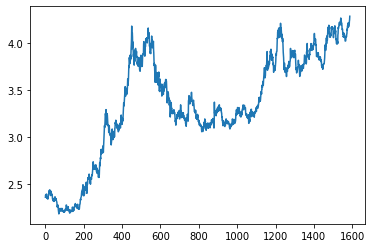

In [11]:
#Plotar o gráfico sem filtro
y_bruto = vetor_entrada_sinais
x_bruto = list()
for valor in range(len(vetor_entrada_sinais)):
    x_bruto.append(valor)
plt.plot(x_bruto, y_bruto)
plt.show()

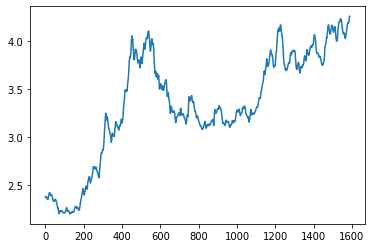

In [12]:
#Plotar filtrado pelo filtro media 5

# Retirando os primeiros e ultimos sinais (5 mod 2)
quant_sinais_exclui = len(m_5) % 2

if quant_sinais_exclui > 0:
    del(saida_vetor_y[:quant_sinais_exclui])
    del(saida_vetor_y[-quant_sinais_exclui])

x = list()
for valor in range(len(saida_vetor_y)):
    x.append(valor)

y = saida_vetor_y
    
plt.plot(x, y)

plt.show()



In [13]:
#Plotar filtrando pela média 11
dicionario_y = gera_dicionario_yn(vetor_entrada_sinais, m_11, dim_y)
saida_vetor_y = list()
for key, value in dicionario_y.items():
    saida_vetor_y.append(value)
    
    
#Plotar filtrado pelo filtro media 11

# Retirando os primeiros e ultimos sinais (11 mod 2)
quant_sinais_exclui = len(m_11) % 2

if quant_sinais_exclui > 0:
    del(saida_vetor_y[:quant_sinais_exclui])
    del(saida_vetor_y[-quant_sinais_exclui])
    
    



Nao transbordou pra nenhum lado. n-k = 0 Vapor_posicao é igual 2.3621
Posição negativa: -1
Posicao espelhada: 0
Valor de x nessa posicao. x[-1] = x[0] = 2.3621
Posição negativa: -2
Posicao espelhada: 1
Valor de x nessa posicao. x[-2] = x[1] = 2.3876
Posição negativa: -3
Posicao espelhada: 2
Valor de x nessa posicao. x[-3] = x[2] = 2.3765
Posição negativa: -4
Posicao espelhada: 3
Valor de x nessa posicao. x[-4] = x[3] = 2.3761
Posição negativa: -5
Posicao espelhada: 4
Valor de x nessa posicao. x[-5] = x[4] = 2.3725
Posição negativa: -6
Posicao espelhada: 5
Valor de x nessa posicao. x[-6] = x[5] = 2.3967
Posição negativa: -7
Posicao espelhada: 6
Valor de x nessa posicao. x[-7] = x[6] = 2.3904
Posição negativa: -8
Posicao espelhada: 7
Valor de x nessa posicao. x[-8] = x[7] = 2.3584
Posição negativa: -9
Posicao espelhada: 8
Valor de x nessa posicao. x[-9] = x[8] = 2.3598
Posição negativa: -10
Posicao espelhada: 9
Valor de x nessa posicao. x[-10] = x[9] = 2.3503
Nao transbordou pra nenhum l

Nao transbordou pra nenhum lado. n-k = 84 Vapor_posicao é igual 2.2359
Nao transbordou pra nenhum lado. n-k = 83 Vapor_posicao é igual 2.2237
Nao transbordou pra nenhum lado. n-k = 82 Vapor_posicao é igual 2.2445
Nao transbordou pra nenhum lado. n-k = 81 Vapor_posicao é igual 2.2138
Nao transbordou pra nenhum lado. n-k = 92 Vapor_posicao é igual 2.2128
Nao transbordou pra nenhum lado. n-k = 91 Vapor_posicao é igual 2.2153
Nao transbordou pra nenhum lado. n-k = 90 Vapor_posicao é igual 2.2166
Nao transbordou pra nenhum lado. n-k = 89 Vapor_posicao é igual 2.2292
Nao transbordou pra nenhum lado. n-k = 88 Vapor_posicao é igual 2.2431
Nao transbordou pra nenhum lado. n-k = 87 Vapor_posicao é igual 2.22
Nao transbordou pra nenhum lado. n-k = 86 Vapor_posicao é igual 2.2335
Nao transbordou pra nenhum lado. n-k = 85 Vapor_posicao é igual 2.233
Nao transbordou pra nenhum lado. n-k = 84 Vapor_posicao é igual 2.2359
Nao transbordou pra nenhum lado. n-k = 83 Vapor_posicao é igual 2.2237
Nao trans

Nao transbordou pra nenhum lado. n-k = 137 Vapor_posicao é igual 2.2208
Nao transbordou pra nenhum lado. n-k = 136 Vapor_posicao é igual 2.2192
Nao transbordou pra nenhum lado. n-k = 135 Vapor_posicao é igual 2.2123
Nao transbordou pra nenhum lado. n-k = 134 Vapor_posicao é igual 2.2123
Nao transbordou pra nenhum lado. n-k = 133 Vapor_posicao é igual 2.224
Nao transbordou pra nenhum lado. n-k = 132 Vapor_posicao é igual 2.2132
Nao transbordou pra nenhum lado. n-k = 131 Vapor_posicao é igual 2.2103
Nao transbordou pra nenhum lado. n-k = 130 Vapor_posicao é igual 2.2252
Nao transbordou pra nenhum lado. n-k = 129 Vapor_posicao é igual 2.2018
Nao transbordou pra nenhum lado. n-k = 128 Vapor_posicao é igual 2.2143
Nao transbordou pra nenhum lado. n-k = 139 Vapor_posicao é igual 2.2199
Nao transbordou pra nenhum lado. n-k = 138 Vapor_posicao é igual 2.2107
Nao transbordou pra nenhum lado. n-k = 137 Vapor_posicao é igual 2.2208
Nao transbordou pra nenhum lado. n-k = 136 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 188 Vapor_posicao é igual 2.3984
Nao transbordou pra nenhum lado. n-k = 187 Vapor_posicao é igual 2.3682
Nao transbordou pra nenhum lado. n-k = 186 Vapor_posicao é igual 2.3646
Nao transbordou pra nenhum lado. n-k = 185 Vapor_posicao é igual 2.3583
Nao transbordou pra nenhum lado. n-k = 184 Vapor_posicao é igual 2.3325
Nao transbordou pra nenhum lado. n-k = 183 Vapor_posicao é igual 2.3427
Nao transbordou pra nenhum lado. n-k = 182 Vapor_posicao é igual 2.3392
Nao transbordou pra nenhum lado. n-k = 181 Vapor_posicao é igual 2.298
Nao transbordou pra nenhum lado. n-k = 192 Vapor_posicao é igual 2.42
Nao transbordou pra nenhum lado. n-k = 191 Vapor_posicao é igual 2.4283
Nao transbordou pra nenhum lado. n-k = 190 Vapor_posicao é igual 2.3836
Nao transbordou pra nenhum lado. n-k = 189 Vapor_posicao é igual 2.4118
Nao transbordou pra nenhum lado. n-k = 188 Vapor_posicao é igual 2.3984
Nao transbordou pra nenhum lado. n-k = 187 Vapor_posicao é igual 2.

Nao transbordou pra nenhum lado. n-k = 236 Vapor_posicao é igual 2.5304
Nao transbordou pra nenhum lado. n-k = 235 Vapor_posicao é igual 2.5011
Nao transbordou pra nenhum lado. n-k = 234 Vapor_posicao é igual 2.5303
Nao transbordou pra nenhum lado. n-k = 233 Vapor_posicao é igual 2.5457
Nao transbordou pra nenhum lado. n-k = 232 Vapor_posicao é igual 2.5153
Nao transbordou pra nenhum lado. n-k = 231 Vapor_posicao é igual 2.5731
Nao transbordou pra nenhum lado. n-k = 242 Vapor_posicao é igual 2.5895
Nao transbordou pra nenhum lado. n-k = 241 Vapor_posicao é igual 2.5915
Nao transbordou pra nenhum lado. n-k = 240 Vapor_posicao é igual 2.5525
Nao transbordou pra nenhum lado. n-k = 239 Vapor_posicao é igual 2.5682
Nao transbordou pra nenhum lado. n-k = 238 Vapor_posicao é igual 2.56
Nao transbordou pra nenhum lado. n-k = 237 Vapor_posicao é igual 2.5659
Nao transbordou pra nenhum lado. n-k = 236 Vapor_posicao é igual 2.5304
Nao transbordou pra nenhum lado. n-k = 235 Vapor_posicao é igual 2

Nao transbordou pra nenhum lado. n-k = 259 Vapor_posicao é igual 2.6575
Nao transbordou pra nenhum lado. n-k = 270 Vapor_posicao é igual 2.6159
Nao transbordou pra nenhum lado. n-k = 269 Vapor_posicao é igual 2.643
Nao transbordou pra nenhum lado. n-k = 268 Vapor_posicao é igual 2.6734
Nao transbordou pra nenhum lado. n-k = 267 Vapor_posicao é igual 2.6301
Nao transbordou pra nenhum lado. n-k = 266 Vapor_posicao é igual 2.663
Nao transbordou pra nenhum lado. n-k = 265 Vapor_posicao é igual 2.6835
Nao transbordou pra nenhum lado. n-k = 264 Vapor_posicao é igual 2.7001
Nao transbordou pra nenhum lado. n-k = 263 Vapor_posicao é igual 2.7064
Nao transbordou pra nenhum lado. n-k = 262 Vapor_posicao é igual 2.6941
Nao transbordou pra nenhum lado. n-k = 261 Vapor_posicao é igual 2.6575
Nao transbordou pra nenhum lado. n-k = 260 Vapor_posicao é igual 2.6575
Nao transbordou pra nenhum lado. n-k = 271 Vapor_posicao é igual 2.6422
Nao transbordou pra nenhum lado. n-k = 270 Vapor_posicao é igual 2

Nao transbordou pra nenhum lado. n-k = 285 Vapor_posicao é igual 2.7418
Nao transbordou pra nenhum lado. n-k = 284 Vapor_posicao é igual 2.6945
Nao transbordou pra nenhum lado. n-k = 283 Vapor_posicao é igual 2.7271
Nao transbordou pra nenhum lado. n-k = 282 Vapor_posicao é igual 2.6824
Nao transbordou pra nenhum lado. n-k = 281 Vapor_posicao é igual 2.6035
Nao transbordou pra nenhum lado. n-k = 292 Vapor_posicao é igual 2.8346
Nao transbordou pra nenhum lado. n-k = 291 Vapor_posicao é igual 2.821
Nao transbordou pra nenhum lado. n-k = 290 Vapor_posicao é igual 2.8693
Nao transbordou pra nenhum lado. n-k = 289 Vapor_posicao é igual 2.8343
Nao transbordou pra nenhum lado. n-k = 288 Vapor_posicao é igual 2.7698
Nao transbordou pra nenhum lado. n-k = 287 Vapor_posicao é igual 2.7825
Nao transbordou pra nenhum lado. n-k = 286 Vapor_posicao é igual 2.7451
Nao transbordou pra nenhum lado. n-k = 285 Vapor_posicao é igual 2.7418
Nao transbordou pra nenhum lado. n-k = 284 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 299 Vapor_posicao é igual 2.833
Nao transbordou pra nenhum lado. n-k = 310 Vapor_posicao é igual 3.1257
Nao transbordou pra nenhum lado. n-k = 309 Vapor_posicao é igual 3.1022
Nao transbordou pra nenhum lado. n-k = 308 Vapor_posicao é igual 3.1223
Nao transbordou pra nenhum lado. n-k = 307 Vapor_posicao é igual 3.0617
Nao transbordou pra nenhum lado. n-k = 306 Vapor_posicao é igual 3.0035
Nao transbordou pra nenhum lado. n-k = 305 Vapor_posicao é igual 2.9766
Nao transbordou pra nenhum lado. n-k = 304 Vapor_posicao é igual 2.9311
Nao transbordou pra nenhum lado. n-k = 303 Vapor_posicao é igual 2.8965
Nao transbordou pra nenhum lado. n-k = 302 Vapor_posicao é igual 2.839
Nao transbordou pra nenhum lado. n-k = 301 Vapor_posicao é igual 2.9085
Nao transbordou pra nenhum lado. n-k = 300 Vapor_posicao é igual 2.875
Nao transbordou pra nenhum lado. n-k = 311 Vapor_posicao é igual 3.1661
Nao transbordou pra nenhum lado. n-k = 310 Vapor_posicao é igual 3.

Nao transbordou pra nenhum lado. n-k = 326 Vapor_posicao é igual 3.1205
Nao transbordou pra nenhum lado. n-k = 325 Vapor_posicao é igual 3.1655
Nao transbordou pra nenhum lado. n-k = 324 Vapor_posicao é igual 3.1958
Nao transbordou pra nenhum lado. n-k = 323 Vapor_posicao é igual 3.2306
Nao transbordou pra nenhum lado. n-k = 322 Vapor_posicao é igual 3.2496
Nao transbordou pra nenhum lado. n-k = 321 Vapor_posicao é igual 3.1828
Nao transbordou pra nenhum lado. n-k = 320 Vapor_posicao é igual 3.2012
Nao transbordou pra nenhum lado. n-k = 319 Vapor_posicao é igual 3.1398
Nao transbordou pra nenhum lado. n-k = 318 Vapor_posicao é igual 3.1322
Nao transbordou pra nenhum lado. n-k = 329 Vapor_posicao é igual 3.1288
Nao transbordou pra nenhum lado. n-k = 328 Vapor_posicao é igual 3.1263
Nao transbordou pra nenhum lado. n-k = 327 Vapor_posicao é igual 3.121
Nao transbordou pra nenhum lado. n-k = 326 Vapor_posicao é igual 3.1205
Nao transbordou pra nenhum lado. n-k = 325 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 364 Vapor_posicao é igual 3.1536
Nao transbordou pra nenhum lado. n-k = 363 Vapor_posicao é igual 3.0968
Nao transbordou pra nenhum lado. n-k = 362 Vapor_posicao é igual 3.0949
Nao transbordou pra nenhum lado. n-k = 361 Vapor_posicao é igual 3.0379
Nao transbordou pra nenhum lado. n-k = 360 Vapor_posicao é igual 3.0027
Nao transbordou pra nenhum lado. n-k = 359 Vapor_posicao é igual 3.0394
Nao transbordou pra nenhum lado. n-k = 370 Vapor_posicao é igual 3.1345
Nao transbordou pra nenhum lado. n-k = 369 Vapor_posicao é igual 3.1306
Nao transbordou pra nenhum lado. n-k = 368 Vapor_posicao é igual 3.1718
Nao transbordou pra nenhum lado. n-k = 367 Vapor_posicao é igual 3.1798
Nao transbordou pra nenhum lado. n-k = 366 Vapor_posicao é igual 3.1624
Nao transbordou pra nenhum lado. n-k = 365 Vapor_posicao é igual 3.1409
Nao transbordou pra nenhum lado. n-k = 364 Vapor_posicao é igual 3.1536
Nao transbordou pra nenhum lado. n-k = 363 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 440 Vapor_posicao é igual 3.7783
Nao transbordou pra nenhum lado. n-k = 439 Vapor_posicao é igual 3.82
Nao transbordou pra nenhum lado. n-k = 438 Vapor_posicao é igual 3.8387
Nao transbordou pra nenhum lado. n-k = 437 Vapor_posicao é igual 3.8442
Nao transbordou pra nenhum lado. n-k = 448 Vapor_posicao é igual 3.9857
Nao transbordou pra nenhum lado. n-k = 447 Vapor_posicao é igual 3.9459
Nao transbordou pra nenhum lado. n-k = 446 Vapor_posicao é igual 3.899
Nao transbordou pra nenhum lado. n-k = 445 Vapor_posicao é igual 3.8289
Nao transbordou pra nenhum lado. n-k = 444 Vapor_posicao é igual 3.8634
Nao transbordou pra nenhum lado. n-k = 443 Vapor_posicao é igual 3.815
Nao transbordou pra nenhum lado. n-k = 442 Vapor_posicao é igual 3.8705
Nao transbordou pra nenhum lado. n-k = 441 Vapor_posicao é igual 3.8498
Nao transbordou pra nenhum lado. n-k = 440 Vapor_posicao é igual 3.7783
Nao transbordou pra nenhum lado. n-k = 439 Vapor_posicao é igual 3.8

Nao transbordou pra nenhum lado. n-k = 465 Vapor_posicao é igual 3.8119
Nao transbordou pra nenhum lado. n-k = 464 Vapor_posicao é igual 3.8937
Nao transbordou pra nenhum lado. n-k = 463 Vapor_posicao é igual 3.7639
Nao transbordou pra nenhum lado. n-k = 462 Vapor_posicao é igual 3.766
Nao transbordou pra nenhum lado. n-k = 461 Vapor_posicao é igual 3.7839
Nao transbordou pra nenhum lado. n-k = 472 Vapor_posicao é igual 3.8807
Nao transbordou pra nenhum lado. n-k = 471 Vapor_posicao é igual 3.9088
Nao transbordou pra nenhum lado. n-k = 470 Vapor_posicao é igual 3.9414
Nao transbordou pra nenhum lado. n-k = 469 Vapor_posicao é igual 3.9073
Nao transbordou pra nenhum lado. n-k = 468 Vapor_posicao é igual 3.8857
Nao transbordou pra nenhum lado. n-k = 467 Vapor_posicao é igual 3.9245
Nao transbordou pra nenhum lado. n-k = 466 Vapor_posicao é igual 3.8032
Nao transbordou pra nenhum lado. n-k = 465 Vapor_posicao é igual 3.8119
Nao transbordou pra nenhum lado. n-k = 464 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 509 Vapor_posicao é igual 3.873
Nao transbordou pra nenhum lado. n-k = 508 Vapor_posicao é igual 3.8779
Nao transbordou pra nenhum lado. n-k = 507 Vapor_posicao é igual 3.873
Nao transbordou pra nenhum lado. n-k = 506 Vapor_posicao é igual 3.8126
Nao transbordou pra nenhum lado. n-k = 505 Vapor_posicao é igual 3.7502
Nao transbordou pra nenhum lado. n-k = 504 Vapor_posicao é igual 3.7962
Nao transbordou pra nenhum lado. n-k = 503 Vapor_posicao é igual 3.7681
Nao transbordou pra nenhum lado. n-k = 502 Vapor_posicao é igual 3.7521
Nao transbordou pra nenhum lado. n-k = 501 Vapor_posicao é igual 3.7596
Nao transbordou pra nenhum lado. n-k = 500 Vapor_posicao é igual 3.8352
Nao transbordou pra nenhum lado. n-k = 499 Vapor_posicao é igual 3.8575
Nao transbordou pra nenhum lado. n-k = 510 Vapor_posicao é igual 3.8848
Nao transbordou pra nenhum lado. n-k = 509 Vapor_posicao é igual 3.873
Nao transbordou pra nenhum lado. n-k = 508 Vapor_posicao é igual 3.

Nao transbordou pra nenhum lado. n-k = 543 Vapor_posicao é igual 3.9629
Nao transbordou pra nenhum lado. n-k = 542 Vapor_posicao é igual 3.9988
Nao transbordou pra nenhum lado. n-k = 541 Vapor_posicao é igual 4.0699
Nao transbordou pra nenhum lado. n-k = 540 Vapor_posicao é igual 4.1077
Nao transbordou pra nenhum lado. n-k = 539 Vapor_posicao é igual 4.0536
Nao transbordou pra nenhum lado. n-k = 538 Vapor_posicao é igual 4.0903
Nao transbordou pra nenhum lado. n-k = 537 Vapor_posicao é igual 4.0945
Nao transbordou pra nenhum lado. n-k = 536 Vapor_posicao é igual 4.1575
Nao transbordou pra nenhum lado. n-k = 535 Vapor_posicao é igual 4.0971
Nao transbordou pra nenhum lado. n-k = 534 Vapor_posicao é igual 4.0626
Nao transbordou pra nenhum lado. n-k = 533 Vapor_posicao é igual 4.0557
Nao transbordou pra nenhum lado. n-k = 544 Vapor_posicao é igual 3.9895
Nao transbordou pra nenhum lado. n-k = 543 Vapor_posicao é igual 3.9629
Nao transbordou pra nenhum lado. n-k = 542 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 556 Vapor_posicao é igual 4.0284
Nao transbordou pra nenhum lado. n-k = 555 Vapor_posicao é igual 3.9851
Nao transbordou pra nenhum lado. n-k = 554 Vapor_posicao é igual 4.0723
Nao transbordou pra nenhum lado. n-k = 553 Vapor_posicao é igual 4.006
Nao transbordou pra nenhum lado. n-k = 564 Vapor_posicao é igual 3.9275
Nao transbordou pra nenhum lado. n-k = 563 Vapor_posicao é igual 4.0171
Nao transbordou pra nenhum lado. n-k = 562 Vapor_posicao é igual 3.9933
Nao transbordou pra nenhum lado. n-k = 561 Vapor_posicao é igual 3.956
Nao transbordou pra nenhum lado. n-k = 560 Vapor_posicao é igual 3.9591
Nao transbordou pra nenhum lado. n-k = 559 Vapor_posicao é igual 3.9569
Nao transbordou pra nenhum lado. n-k = 558 Vapor_posicao é igual 3.9473
Nao transbordou pra nenhum lado. n-k = 557 Vapor_posicao é igual 4.0214
Nao transbordou pra nenhum lado. n-k = 556 Vapor_posicao é igual 4.0284
Nao transbordou pra nenhum lado. n-k = 555 Vapor_posicao é igual 3

Nao transbordou pra nenhum lado. n-k = 585 Vapor_posicao é igual 3.6002
Nao transbordou pra nenhum lado. n-k = 584 Vapor_posicao é igual 3.6386
Nao transbordou pra nenhum lado. n-k = 583 Vapor_posicao é igual 3.6278
Nao transbordou pra nenhum lado. n-k = 582 Vapor_posicao é igual 3.6835
Nao transbordou pra nenhum lado. n-k = 581 Vapor_posicao é igual 3.6771
Nao transbordou pra nenhum lado. n-k = 592 Vapor_posicao é igual 3.5901
Nao transbordou pra nenhum lado. n-k = 591 Vapor_posicao é igual 3.6905
Nao transbordou pra nenhum lado. n-k = 590 Vapor_posicao é igual 3.6413
Nao transbordou pra nenhum lado. n-k = 589 Vapor_posicao é igual 3.6805
Nao transbordou pra nenhum lado. n-k = 588 Vapor_posicao é igual 3.624
Nao transbordou pra nenhum lado. n-k = 587 Vapor_posicao é igual 3.5538
Nao transbordou pra nenhum lado. n-k = 586 Vapor_posicao é igual 3.5935
Nao transbordou pra nenhum lado. n-k = 585 Vapor_posicao é igual 3.6002
Nao transbordou pra nenhum lado. n-k = 584 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 608 Vapor_posicao é igual 3.5011
Nao transbordou pra nenhum lado. n-k = 607 Vapor_posicao é igual 3.4358
Nao transbordou pra nenhum lado. n-k = 606 Vapor_posicao é igual 3.4878
Nao transbordou pra nenhum lado. n-k = 617 Vapor_posicao é igual 3.534
Nao transbordou pra nenhum lado. n-k = 616 Vapor_posicao é igual 3.4855
Nao transbordou pra nenhum lado. n-k = 615 Vapor_posicao é igual 3.4528
Nao transbordou pra nenhum lado. n-k = 614 Vapor_posicao é igual 3.4758
Nao transbordou pra nenhum lado. n-k = 613 Vapor_posicao é igual 3.5164
Nao transbordou pra nenhum lado. n-k = 612 Vapor_posicao é igual 3.5023
Nao transbordou pra nenhum lado. n-k = 611 Vapor_posicao é igual 3.5349
Nao transbordou pra nenhum lado. n-k = 610 Vapor_posicao é igual 3.5473
Nao transbordou pra nenhum lado. n-k = 609 Vapor_posicao é igual 3.5599
Nao transbordou pra nenhum lado. n-k = 608 Vapor_posicao é igual 3.5011
Nao transbordou pra nenhum lado. n-k = 607 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 650 Vapor_posicao é igual 3.222
Nao transbordou pra nenhum lado. n-k = 649 Vapor_posicao é igual 3.3029
Nao transbordou pra nenhum lado. n-k = 648 Vapor_posicao é igual 3.3926
Nao transbordou pra nenhum lado. n-k = 647 Vapor_posicao é igual 3.3739
Nao transbordou pra nenhum lado. n-k = 646 Vapor_posicao é igual 3.339
Nao transbordou pra nenhum lado. n-k = 645 Vapor_posicao é igual 3.377
Nao transbordou pra nenhum lado. n-k = 656 Vapor_posicao é igual 3.3678
Nao transbordou pra nenhum lado. n-k = 655 Vapor_posicao é igual 3.33
Nao transbordou pra nenhum lado. n-k = 654 Vapor_posicao é igual 3.3024
Nao transbordou pra nenhum lado. n-k = 653 Vapor_posicao é igual 3.2695
Nao transbordou pra nenhum lado. n-k = 652 Vapor_posicao é igual 3.2361
Nao transbordou pra nenhum lado. n-k = 651 Vapor_posicao é igual 3.2134
Nao transbordou pra nenhum lado. n-k = 650 Vapor_posicao é igual 3.222
Nao transbordou pra nenhum lado. n-k = 649 Vapor_posicao é igual 3.302

Nao transbordou pra nenhum lado. n-k = 686 Vapor_posicao é igual 3.2393
Nao transbordou pra nenhum lado. n-k = 685 Vapor_posicao é igual 3.2037
Nao transbordou pra nenhum lado. n-k = 696 Vapor_posicao é igual 3.2582
Nao transbordou pra nenhum lado. n-k = 695 Vapor_posicao é igual 3.2273
Nao transbordou pra nenhum lado. n-k = 694 Vapor_posicao é igual 3.2419
Nao transbordou pra nenhum lado. n-k = 693 Vapor_posicao é igual 3.2298
Nao transbordou pra nenhum lado. n-k = 692 Vapor_posicao é igual 3.2655
Nao transbordou pra nenhum lado. n-k = 691 Vapor_posicao é igual 3.2367
Nao transbordou pra nenhum lado. n-k = 690 Vapor_posicao é igual 3.2257
Nao transbordou pra nenhum lado. n-k = 689 Vapor_posicao é igual 3.2338
Nao transbordou pra nenhum lado. n-k = 688 Vapor_posicao é igual 3.2014
Nao transbordou pra nenhum lado. n-k = 687 Vapor_posicao é igual 3.2038
Nao transbordou pra nenhum lado. n-k = 686 Vapor_posicao é igual 3.2393
Nao transbordou pra nenhum lado. n-k = 697 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 743 Vapor_posicao é igual 3.202
Nao transbordou pra nenhum lado. n-k = 742 Vapor_posicao é igual 3.2337
Nao transbordou pra nenhum lado. n-k = 741 Vapor_posicao é igual 3.2425
Nao transbordou pra nenhum lado. n-k = 740 Vapor_posicao é igual 3.2359
Nao transbordou pra nenhum lado. n-k = 751 Vapor_posicao é igual 3.4193
Nao transbordou pra nenhum lado. n-k = 750 Vapor_posicao é igual 3.42
Nao transbordou pra nenhum lado. n-k = 749 Vapor_posicao é igual 3.4404
Nao transbordou pra nenhum lado. n-k = 748 Vapor_posicao é igual 3.4331
Nao transbordou pra nenhum lado. n-k = 747 Vapor_posicao é igual 3.3915
Nao transbordou pra nenhum lado. n-k = 746 Vapor_posicao é igual 3.3864
Nao transbordou pra nenhum lado. n-k = 745 Vapor_posicao é igual 3.2172
Nao transbordou pra nenhum lado. n-k = 744 Vapor_posicao é igual 3.1695
Nao transbordou pra nenhum lado. n-k = 743 Vapor_posicao é igual 3.202
Nao transbordou pra nenhum lado. n-k = 742 Vapor_posicao é igual 3.2

Nao transbordou pra nenhum lado. n-k = 784 Vapor_posicao é igual 3.2652
Nao transbordou pra nenhum lado. n-k = 783 Vapor_posicao é igual 3.2857
Nao transbordou pra nenhum lado. n-k = 794 Vapor_posicao é igual 3.2115
Nao transbordou pra nenhum lado. n-k = 793 Vapor_posicao é igual 3.2418
Nao transbordou pra nenhum lado. n-k = 792 Vapor_posicao é igual 3.2213
Nao transbordou pra nenhum lado. n-k = 791 Vapor_posicao é igual 3.1881
Nao transbordou pra nenhum lado. n-k = 790 Vapor_posicao é igual 3.1975
Nao transbordou pra nenhum lado. n-k = 789 Vapor_posicao é igual 3.1961
Nao transbordou pra nenhum lado. n-k = 788 Vapor_posicao é igual 3.1969
Nao transbordou pra nenhum lado. n-k = 787 Vapor_posicao é igual 3.2241
Nao transbordou pra nenhum lado. n-k = 786 Vapor_posicao é igual 3.1991
Nao transbordou pra nenhum lado. n-k = 785 Vapor_posicao é igual 3.2163
Nao transbordou pra nenhum lado. n-k = 784 Vapor_posicao é igual 3.2652
Nao transbordou pra nenhum lado. n-k = 795 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 895 Vapor_posicao é igual 3.2695
Nao transbordou pra nenhum lado. n-k = 894 Vapor_posicao é igual 3.2778
Nao transbordou pra nenhum lado. n-k = 893 Vapor_posicao é igual 3.2969
Nao transbordou pra nenhum lado. n-k = 892 Vapor_posicao é igual 3.2483
Nao transbordou pra nenhum lado. n-k = 891 Vapor_posicao é igual 3.2506
Nao transbordou pra nenhum lado. n-k = 890 Vapor_posicao é igual 3.2266
Nao transbordou pra nenhum lado. n-k = 889 Vapor_posicao é igual 3.2577
Nao transbordou pra nenhum lado. n-k = 888 Vapor_posicao é igual 3.2567
Nao transbordou pra nenhum lado. n-k = 899 Vapor_posicao é igual 3.3154
Nao transbordou pra nenhum lado. n-k = 898 Vapor_posicao é igual 3.3181
Nao transbordou pra nenhum lado. n-k = 897 Vapor_posicao é igual 3.2971
Nao transbordou pra nenhum lado. n-k = 896 Vapor_posicao é igual 3.2617
Nao transbordou pra nenhum lado. n-k = 895 Vapor_posicao é igual 3.2695
Nao transbordou pra nenhum lado. n-k = 894 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 962 Vapor_posicao é igual 3.0867
Nao transbordou pra nenhum lado. n-k = 961 Vapor_posicao é igual 3.0993
Nao transbordou pra nenhum lado. n-k = 960 Vapor_posicao é igual 3.1004
Nao transbordou pra nenhum lado. n-k = 959 Vapor_posicao é igual 3.1174
Nao transbordou pra nenhum lado. n-k = 958 Vapor_posicao é igual 3.1417
Nao transbordou pra nenhum lado. n-k = 957 Vapor_posicao é igual 3.1416
Nao transbordou pra nenhum lado. n-k = 956 Vapor_posicao é igual 3.1479
Nao transbordou pra nenhum lado. n-k = 955 Vapor_posicao é igual 3.1603
Nao transbordou pra nenhum lado. n-k = 954 Vapor_posicao é igual 3.1652
Nao transbordou pra nenhum lado. n-k = 953 Vapor_posicao é igual 3.167
Nao transbordou pra nenhum lado. n-k = 964 Vapor_posicao é igual 3.1252
Nao transbordou pra nenhum lado. n-k = 963 Vapor_posicao é igual 3.1029
Nao transbordou pra nenhum lado. n-k = 962 Vapor_posicao é igual 3.0867
Nao transbordou pra nenhum lado. n-k = 961 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 1042 Vapor_posicao é igual 3.3125
Nao transbordou pra nenhum lado. n-k = 1041 Vapor_posicao é igual 3.3125
Nao transbordou pra nenhum lado. n-k = 1040 Vapor_posicao é igual 3.315
Nao transbordou pra nenhum lado. n-k = 1039 Vapor_posicao é igual 3.3111
Nao transbordou pra nenhum lado. n-k = 1038 Vapor_posicao é igual 3.337
Nao transbordou pra nenhum lado. n-k = 1049 Vapor_posicao é igual 3.2483
Nao transbordou pra nenhum lado. n-k = 1048 Vapor_posicao é igual 3.2407
Nao transbordou pra nenhum lado. n-k = 1047 Vapor_posicao é igual 3.2292
Nao transbordou pra nenhum lado. n-k = 1046 Vapor_posicao é igual 3.2346
Nao transbordou pra nenhum lado. n-k = 1045 Vapor_posicao é igual 3.237
Nao transbordou pra nenhum lado. n-k = 1044 Vapor_posicao é igual 3.2591
Nao transbordou pra nenhum lado. n-k = 1043 Vapor_posicao é igual 3.3125
Nao transbordou pra nenhum lado. n-k = 1042 Vapor_posicao é igual 3.3125
Nao transbordou pra nenhum lado. n-k = 1041 Vapor_posi

Nao transbordou pra nenhum lado. n-k = 1097 Vapor_posicao é igual 3.2811
Nao transbordou pra nenhum lado. n-k = 1096 Vapor_posicao é igual 3.2862
Nao transbordou pra nenhum lado. n-k = 1095 Vapor_posicao é igual 3.2607
Nao transbordou pra nenhum lado. n-k = 1094 Vapor_posicao é igual 3.2607
Nao transbordou pra nenhum lado. n-k = 1093 Vapor_posicao é igual 3.2622
Nao transbordou pra nenhum lado. n-k = 1092 Vapor_posicao é igual 3.2553
Nao transbordou pra nenhum lado. n-k = 1091 Vapor_posicao é igual 3.2669
Nao transbordou pra nenhum lado. n-k = 1102 Vapor_posicao é igual 3.3123
Nao transbordou pra nenhum lado. n-k = 1101 Vapor_posicao é igual 3.3159
Nao transbordou pra nenhum lado. n-k = 1100 Vapor_posicao é igual 3.2725
Nao transbordou pra nenhum lado. n-k = 1099 Vapor_posicao é igual 3.3117
Nao transbordou pra nenhum lado. n-k = 1098 Vapor_posicao é igual 3.2862
Nao transbordou pra nenhum lado. n-k = 1097 Vapor_posicao é igual 3.2811
Nao transbordou pra nenhum lado. n-k = 1096 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1183 Vapor_posicao é igual 3.8605
Nao transbordou pra nenhum lado. n-k = 1182 Vapor_posicao é igual 3.8518
Nao transbordou pra nenhum lado. n-k = 1181 Vapor_posicao é igual 3.8822
Nao transbordou pra nenhum lado. n-k = 1180 Vapor_posicao é igual 3.8773
Nao transbordou pra nenhum lado. n-k = 1179 Vapor_posicao é igual 3.8152
Nao transbordou pra nenhum lado. n-k = 1178 Vapor_posicao é igual 3.8727
Nao transbordou pra nenhum lado. n-k = 1177 Vapor_posicao é igual 3.8628
Nao transbordou pra nenhum lado. n-k = 1176 Vapor_posicao é igual 3.9327
Nao transbordou pra nenhum lado. n-k = 1175 Vapor_posicao é igual 3.9137
Nao transbordou pra nenhum lado. n-k = 1174 Vapor_posicao é igual 3.8975
Nao transbordou pra nenhum lado. n-k = 1173 Vapor_posicao é igual 3.9129
Nao transbordou pra nenhum lado. n-k = 1184 Vapor_posicao é igual 3.8388
Nao transbordou pra nenhum lado. n-k = 1183 Vapor_posicao é igual 3.8605
Nao transbordou pra nenhum lado. n-k = 1182 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1228 Vapor_posicao é igual 4.1324
Nao transbordou pra nenhum lado. n-k = 1227 Vapor_posicao é igual 4.1742
Nao transbordou pra nenhum lado. n-k = 1226 Vapor_posicao é igual 4.2077
Nao transbordou pra nenhum lado. n-k = 1225 Vapor_posicao é igual 4.1579
Nao transbordou pra nenhum lado. n-k = 1236 Vapor_posicao é igual 4.0123
Nao transbordou pra nenhum lado. n-k = 1235 Vapor_posicao é igual 4.0322
Nao transbordou pra nenhum lado. n-k = 1234 Vapor_posicao é igual 4.0757
Nao transbordou pra nenhum lado. n-k = 1233 Vapor_posicao é igual 4.0928
Nao transbordou pra nenhum lado. n-k = 1232 Vapor_posicao é igual 4.0516
Nao transbordou pra nenhum lado. n-k = 1231 Vapor_posicao é igual 4.0771
Nao transbordou pra nenhum lado. n-k = 1230 Vapor_posicao é igual 4.1315
Nao transbordou pra nenhum lado. n-k = 1229 Vapor_posicao é igual 4.1604
Nao transbordou pra nenhum lado. n-k = 1228 Vapor_posicao é igual 4.1324
Nao transbordou pra nenhum lado. n-k = 1227 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1293 Vapor_posicao é igual 3.8995
Nao transbordou pra nenhum lado. n-k = 1292 Vapor_posicao é igual 3.9171
Nao transbordou pra nenhum lado. n-k = 1291 Vapor_posicao é igual 3.8911
Nao transbordou pra nenhum lado. n-k = 1290 Vapor_posicao é igual 3.8555
Nao transbordou pra nenhum lado. n-k = 1289 Vapor_posicao é igual 3.904
Nao transbordou pra nenhum lado. n-k = 1288 Vapor_posicao é igual 3.9181
Nao transbordou pra nenhum lado. n-k = 1287 Vapor_posicao é igual 3.9075
Nao transbordou pra nenhum lado. n-k = 1286 Vapor_posicao é igual 3.8793
Nao transbordou pra nenhum lado. n-k = 1297 Vapor_posicao é igual 3.904
Nao transbordou pra nenhum lado. n-k = 1296 Vapor_posicao é igual 3.8422
Nao transbordou pra nenhum lado. n-k = 1295 Vapor_posicao é igual 3.8977
Nao transbordou pra nenhum lado. n-k = 1294 Vapor_posicao é igual 3.9124
Nao transbordou pra nenhum lado. n-k = 1293 Vapor_posicao é igual 3.8995
Nao transbordou pra nenhum lado. n-k = 1292 Vapor_pos

Nao transbordou pra nenhum lado. n-k = 1358 Vapor_posicao é igual 3.7915
Nao transbordou pra nenhum lado. n-k = 1357 Vapor_posicao é igual 3.8144
Nao transbordou pra nenhum lado. n-k = 1356 Vapor_posicao é igual 3.8443
Nao transbordou pra nenhum lado. n-k = 1355 Vapor_posicao é igual 3.8147
Nao transbordou pra nenhum lado. n-k = 1354 Vapor_posicao é igual 3.8114
Nao transbordou pra nenhum lado. n-k = 1353 Vapor_posicao é igual 3.8403
Nao transbordou pra nenhum lado. n-k = 1352 Vapor_posicao é igual 3.8668
Nao transbordou pra nenhum lado. n-k = 1351 Vapor_posicao é igual 3.8704
Nao transbordou pra nenhum lado. n-k = 1350 Vapor_posicao é igual 3.8401
Nao transbordou pra nenhum lado. n-k = 1349 Vapor_posicao é igual 3.7755
Nao transbordou pra nenhum lado. n-k = 1360 Vapor_posicao é igual 3.7763
Nao transbordou pra nenhum lado. n-k = 1359 Vapor_posicao é igual 3.7891
Nao transbordou pra nenhum lado. n-k = 1358 Vapor_posicao é igual 3.7915
Nao transbordou pra nenhum lado. n-k = 1357 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1408 Vapor_posicao é igual 4.0423
Nao transbordou pra nenhum lado. n-k = 1407 Vapor_posicao é igual 4.0225
Nao transbordou pra nenhum lado. n-k = 1406 Vapor_posicao é igual 4.0401
Nao transbordou pra nenhum lado. n-k = 1405 Vapor_posicao é igual 4.0403
Nao transbordou pra nenhum lado. n-k = 1404 Vapor_posicao é igual 4.039
Nao transbordou pra nenhum lado. n-k = 1403 Vapor_posicao é igual 4.0968
Nao transbordou pra nenhum lado. n-k = 1402 Vapor_posicao é igual 4.0999
Nao transbordou pra nenhum lado. n-k = 1401 Vapor_posicao é igual 4.0469
Nao transbordou pra nenhum lado. n-k = 1400 Vapor_posicao é igual 4.0017
Nao transbordou pra nenhum lado. n-k = 1399 Vapor_posicao é igual 3.9751
Nao transbordou pra nenhum lado. n-k = 1398 Vapor_posicao é igual 3.9939
Nao transbordou pra nenhum lado. n-k = 1409 Vapor_posicao é igual 4.0247
Nao transbordou pra nenhum lado. n-k = 1408 Vapor_posicao é igual 4.0423
Nao transbordou pra nenhum lado. n-k = 1407 Vapor_po

Nao transbordou pra nenhum lado. n-k = 1430 Vapor_posicao é igual 3.8445
Nao transbordou pra nenhum lado. n-k = 1429 Vapor_posicao é igual 3.848
Nao transbordou pra nenhum lado. n-k = 1428 Vapor_posicao é igual 3.8254
Nao transbordou pra nenhum lado. n-k = 1427 Vapor_posicao é igual 3.8192
Nao transbordou pra nenhum lado. n-k = 1426 Vapor_posicao é igual 3.839
Nao transbordou pra nenhum lado. n-k = 1425 Vapor_posicao é igual 3.839
Nao transbordou pra nenhum lado. n-k = 1424 Vapor_posicao é igual 3.8603
Nao transbordou pra nenhum lado. n-k = 1423 Vapor_posicao é igual 3.8883
Nao transbordou pra nenhum lado. n-k = 1422 Vapor_posicao é igual 3.8958
Nao transbordou pra nenhum lado. n-k = 1421 Vapor_posicao é igual 3.8487
Nao transbordou pra nenhum lado. n-k = 1432 Vapor_posicao é igual 3.852
Nao transbordou pra nenhum lado. n-k = 1431 Vapor_posicao é igual 3.8196
Nao transbordou pra nenhum lado. n-k = 1430 Vapor_posicao é igual 3.8445
Nao transbordou pra nenhum lado. n-k = 1429 Vapor_posic

Nao transbordou pra nenhum lado. n-k = 1452 Vapor_posicao é igual 3.7761
Nao transbordou pra nenhum lado. n-k = 1451 Vapor_posicao é igual 3.779
Nao transbordou pra nenhum lado. n-k = 1450 Vapor_posicao é igual 3.7736
Nao transbordou pra nenhum lado. n-k = 1449 Vapor_posicao é igual 3.7737
Nao transbordou pra nenhum lado. n-k = 1448 Vapor_posicao é igual 3.7407
Nao transbordou pra nenhum lado. n-k = 1447 Vapor_posicao é igual 3.7494
Nao transbordou pra nenhum lado. n-k = 1446 Vapor_posicao é igual 3.7193
Nao transbordou pra nenhum lado. n-k = 1445 Vapor_posicao é igual 3.7641
Nao transbordou pra nenhum lado. n-k = 1456 Vapor_posicao é igual 3.8403
Nao transbordou pra nenhum lado. n-k = 1455 Vapor_posicao é igual 3.8129
Nao transbordou pra nenhum lado. n-k = 1454 Vapor_posicao é igual 3.7906
Nao transbordou pra nenhum lado. n-k = 1453 Vapor_posicao é igual 3.7816
Nao transbordou pra nenhum lado. n-k = 1452 Vapor_posicao é igual 3.7761
Nao transbordou pra nenhum lado. n-k = 1451 Vapor_po

Nao transbordou pra nenhum lado. n-k = 1515 Vapor_posicao é igual 4.0346
Nao transbordou pra nenhum lado. n-k = 1514 Vapor_posicao é igual 4.0819
Nao transbordou pra nenhum lado. n-k = 1513 Vapor_posicao é igual 4.1293
Nao transbordou pra nenhum lado. n-k = 1512 Vapor_posicao é igual 4.1117
Nao transbordou pra nenhum lado. n-k = 1511 Vapor_posicao é igual 4.1643
Nao transbordou pra nenhum lado. n-k = 1510 Vapor_posicao é igual 4.1518
Nao transbordou pra nenhum lado. n-k = 1509 Vapor_posicao é igual 4.1807
Nao transbordou pra nenhum lado. n-k = 1508 Vapor_posicao é igual 4.1265
Nao transbordou pra nenhum lado. n-k = 1519 Vapor_posicao é igual 3.9986
Nao transbordou pra nenhum lado. n-k = 1518 Vapor_posicao é igual 3.991
Nao transbordou pra nenhum lado. n-k = 1517 Vapor_posicao é igual 4.0038
Nao transbordou pra nenhum lado. n-k = 1516 Vapor_posicao é igual 4.0415
Nao transbordou pra nenhum lado. n-k = 1515 Vapor_posicao é igual 4.0346
Nao transbordou pra nenhum lado. n-k = 1514 Vapor_po

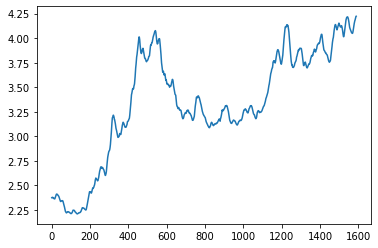

In [14]:
#Plotar filtrado pelo filtro media 11
x = list()
for valor in range(len(saida_vetor_y)):
    x.append(valor)

y = saida_vetor_y
    
plt.plot(x, y)

plt.show()

In [15]:
#Filtro Gaussiano g_5
def gaussiano_n(tamanho):
    lista_filtro_gaussiano = list()
    linha = tamanho - 1
    soma_coef = 0
    for i in range(linha+1):
        coef_binomial = coeficiente_binomial(linha,i)
        soma_coef = soma_coef + coef_binomial
        lista_filtro_gaussiano.append(coef_binomial)
    
    for n in range(len(lista_filtro_gaussiano)):
        lista_filtro_gaussiano[n] = lista_filtro_gaussiano[n] / soma_coef
    
    return lista_filtro_gaussiano

In [16]:
def fatorial(numero):
    fatorial = 1
    while (numero > 0):
        fatorial = fatorial * numero
        numero -= 1
        
    return fatorial
        
    
    

In [17]:
def coeficiente_binomial(linha, kaesimo):
    
    #linha! / (kesimo! * (linha - kesimo)!)
    n = fatorial(linha)
    k = fatorial(kaesimo)
    diferenca = linha - kaesimo
    diferenca = fatorial(diferenca)
    coef_binomial = n / (k * diferenca)
    return coef_binomial
    

In [18]:
# Filtro gaussiano tamanho 5
g_5 = gaussiano_n(5)
g_5

[0.0625, 0.25, 0.375, 0.25, 0.0625]

In [19]:
#Filtro gaussiano tamanho 11
g_11 = gaussiano_n(11)
g_11

[0.0009765625,
 0.009765625,
 0.0439453125,
 0.1171875,
 0.205078125,
 0.24609375,
 0.205078125,
 0.1171875,
 0.0439453125,
 0.009765625,
 0.0009765625]

In [20]:
dicionario_g_5 = gera_dicionario_yn(vetor_entrada_sinais, g_5, dim_y)
dicionario_g_11 = gera_dicionario_yn(vetor_entrada_sinais, g_11, dim_y)

Nao transbordou pra nenhum lado. n-k = 0 Vapor_posicao é igual 2.3621
Posição negativa: -1
Posicao espelhada: 0
Valor de x nessa posicao. x[-1] = x[0] = 2.3621
Posição negativa: -2
Posicao espelhada: 1
Valor de x nessa posicao. x[-2] = x[1] = 2.3876
Posição negativa: -3
Posicao espelhada: 2
Valor de x nessa posicao. x[-3] = x[2] = 2.3765
Posição negativa: -4
Posicao espelhada: 3
Valor de x nessa posicao. x[-4] = x[3] = 2.3761
Nao transbordou pra nenhum lado. n-k = 1 Vapor_posicao é igual 2.3876
Nao transbordou pra nenhum lado. n-k = 0 Vapor_posicao é igual 2.3621
Posição negativa: -1
Posicao espelhada: 0
Valor de x nessa posicao. x[-1] = x[0] = 2.3621
Posição negativa: -2
Posicao espelhada: 1
Valor de x nessa posicao. x[-2] = x[1] = 2.3876
Posição negativa: -3
Posicao espelhada: 2
Valor de x nessa posicao. x[-3] = x[2] = 2.3765
Nao transbordou pra nenhum lado. n-k = 2 Vapor_posicao é igual 2.3765
Nao transbordou pra nenhum lado. n-k = 1 Vapor_posicao é igual 2.3876
Nao transbordou pra 

Nao transbordou pra nenhum lado. n-k = 186 Vapor_posicao é igual 2.3646
Nao transbordou pra nenhum lado. n-k = 185 Vapor_posicao é igual 2.3583
Nao transbordou pra nenhum lado. n-k = 184 Vapor_posicao é igual 2.3325
Nao transbordou pra nenhum lado. n-k = 183 Vapor_posicao é igual 2.3427
Nao transbordou pra nenhum lado. n-k = 182 Vapor_posicao é igual 2.3392
Nao transbordou pra nenhum lado. n-k = 187 Vapor_posicao é igual 2.3682
Nao transbordou pra nenhum lado. n-k = 186 Vapor_posicao é igual 2.3646
Nao transbordou pra nenhum lado. n-k = 185 Vapor_posicao é igual 2.3583
Nao transbordou pra nenhum lado. n-k = 184 Vapor_posicao é igual 2.3325
Nao transbordou pra nenhum lado. n-k = 183 Vapor_posicao é igual 2.3427
Nao transbordou pra nenhum lado. n-k = 188 Vapor_posicao é igual 2.3984
Nao transbordou pra nenhum lado. n-k = 187 Vapor_posicao é igual 2.3682
Nao transbordou pra nenhum lado. n-k = 186 Vapor_posicao é igual 2.3646
Nao transbordou pra nenhum lado. n-k = 185 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 352 Vapor_posicao é igual 2.9733
Nao transbordou pra nenhum lado. n-k = 351 Vapor_posicao é igual 3.026
Nao transbordou pra nenhum lado. n-k = 350 Vapor_posicao é igual 3.0333
Nao transbordou pra nenhum lado. n-k = 349 Vapor_posicao é igual 3.0536
Nao transbordou pra nenhum lado. n-k = 348 Vapor_posicao é igual 3.0864
Nao transbordou pra nenhum lado. n-k = 353 Vapor_posicao é igual 3.0614
Nao transbordou pra nenhum lado. n-k = 352 Vapor_posicao é igual 2.9733
Nao transbordou pra nenhum lado. n-k = 351 Vapor_posicao é igual 3.026
Nao transbordou pra nenhum lado. n-k = 350 Vapor_posicao é igual 3.0333
Nao transbordou pra nenhum lado. n-k = 349 Vapor_posicao é igual 3.0536
Nao transbordou pra nenhum lado. n-k = 354 Vapor_posicao é igual 3.0206
Nao transbordou pra nenhum lado. n-k = 353 Vapor_posicao é igual 3.0614
Nao transbordou pra nenhum lado. n-k = 352 Vapor_posicao é igual 2.9733
Nao transbordou pra nenhum lado. n-k = 351 Vapor_posicao é igual 3

Nao transbordou pra nenhum lado. n-k = 481 Vapor_posicao é igual 3.7813
Nao transbordou pra nenhum lado. n-k = 486 Vapor_posicao é igual 3.771
Nao transbordou pra nenhum lado. n-k = 485 Vapor_posicao é igual 3.7639
Nao transbordou pra nenhum lado. n-k = 484 Vapor_posicao é igual 3.751
Nao transbordou pra nenhum lado. n-k = 483 Vapor_posicao é igual 3.799
Nao transbordou pra nenhum lado. n-k = 482 Vapor_posicao é igual 3.7713
Nao transbordou pra nenhum lado. n-k = 487 Vapor_posicao é igual 3.8456
Nao transbordou pra nenhum lado. n-k = 486 Vapor_posicao é igual 3.771
Nao transbordou pra nenhum lado. n-k = 485 Vapor_posicao é igual 3.7639
Nao transbordou pra nenhum lado. n-k = 484 Vapor_posicao é igual 3.751
Nao transbordou pra nenhum lado. n-k = 483 Vapor_posicao é igual 3.799
Nao transbordou pra nenhum lado. n-k = 488 Vapor_posicao é igual 3.8194
Nao transbordou pra nenhum lado. n-k = 487 Vapor_posicao é igual 3.8456
Nao transbordou pra nenhum lado. n-k = 486 Vapor_posicao é igual 3.771

Nao transbordou pra nenhum lado. n-k = 662 Vapor_posicao é igual 3.282
Nao transbordou pra nenhum lado. n-k = 661 Vapor_posicao é igual 3.2511
Nao transbordou pra nenhum lado. n-k = 660 Vapor_posicao é igual 3.2637
Nao transbordou pra nenhum lado. n-k = 659 Vapor_posicao é igual 3.296
Nao transbordou pra nenhum lado. n-k = 658 Vapor_posicao é igual 3.3094
Nao transbordou pra nenhum lado. n-k = 663 Vapor_posicao é igual 3.2532
Nao transbordou pra nenhum lado. n-k = 662 Vapor_posicao é igual 3.282
Nao transbordou pra nenhum lado. n-k = 661 Vapor_posicao é igual 3.2511
Nao transbordou pra nenhum lado. n-k = 660 Vapor_posicao é igual 3.2637
Nao transbordou pra nenhum lado. n-k = 659 Vapor_posicao é igual 3.296
Nao transbordou pra nenhum lado. n-k = 664 Vapor_posicao é igual 3.249
Nao transbordou pra nenhum lado. n-k = 663 Vapor_posicao é igual 3.2532
Nao transbordou pra nenhum lado. n-k = 662 Vapor_posicao é igual 3.282
Nao transbordou pra nenhum lado. n-k = 661 Vapor_posicao é igual 3.251

Nao transbordou pra nenhum lado. n-k = 782 Vapor_posicao é igual 3.2547
Nao transbordou pra nenhum lado. n-k = 781 Vapor_posicao é igual 3.2547
Nao transbordou pra nenhum lado. n-k = 786 Vapor_posicao é igual 3.1991
Nao transbordou pra nenhum lado. n-k = 785 Vapor_posicao é igual 3.2163
Nao transbordou pra nenhum lado. n-k = 784 Vapor_posicao é igual 3.2652
Nao transbordou pra nenhum lado. n-k = 783 Vapor_posicao é igual 3.2857
Nao transbordou pra nenhum lado. n-k = 782 Vapor_posicao é igual 3.2547
Nao transbordou pra nenhum lado. n-k = 787 Vapor_posicao é igual 3.2241
Nao transbordou pra nenhum lado. n-k = 786 Vapor_posicao é igual 3.1991
Nao transbordou pra nenhum lado. n-k = 785 Vapor_posicao é igual 3.2163
Nao transbordou pra nenhum lado. n-k = 784 Vapor_posicao é igual 3.2652
Nao transbordou pra nenhum lado. n-k = 783 Vapor_posicao é igual 3.2857
Nao transbordou pra nenhum lado. n-k = 788 Vapor_posicao é igual 3.1969
Nao transbordou pra nenhum lado. n-k = 787 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 959 Vapor_posicao é igual 3.1174
Nao transbordou pra nenhum lado. n-k = 958 Vapor_posicao é igual 3.1417
Nao transbordou pra nenhum lado. n-k = 957 Vapor_posicao é igual 3.1416
Nao transbordou pra nenhum lado. n-k = 956 Vapor_posicao é igual 3.1479
Nao transbordou pra nenhum lado. n-k = 955 Vapor_posicao é igual 3.1603
Nao transbordou pra nenhum lado. n-k = 960 Vapor_posicao é igual 3.1004
Nao transbordou pra nenhum lado. n-k = 959 Vapor_posicao é igual 3.1174
Nao transbordou pra nenhum lado. n-k = 958 Vapor_posicao é igual 3.1417
Nao transbordou pra nenhum lado. n-k = 957 Vapor_posicao é igual 3.1416
Nao transbordou pra nenhum lado. n-k = 956 Vapor_posicao é igual 3.1479
Nao transbordou pra nenhum lado. n-k = 961 Vapor_posicao é igual 3.0993
Nao transbordou pra nenhum lado. n-k = 960 Vapor_posicao é igual 3.1004
Nao transbordou pra nenhum lado. n-k = 959 Vapor_posicao é igual 3.1174
Nao transbordou pra nenhum lado. n-k = 958 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 1056 Vapor_posicao é igual 3.2065
Nao transbordou pra nenhum lado. n-k = 1055 Vapor_posicao é igual 3.2238
Nao transbordou pra nenhum lado. n-k = 1060 Vapor_posicao é igual 3.1465
Nao transbordou pra nenhum lado. n-k = 1059 Vapor_posicao é igual 3.237
Nao transbordou pra nenhum lado. n-k = 1058 Vapor_posicao é igual 3.2021
Nao transbordou pra nenhum lado. n-k = 1057 Vapor_posicao é igual 3.1962
Nao transbordou pra nenhum lado. n-k = 1056 Vapor_posicao é igual 3.2065
Nao transbordou pra nenhum lado. n-k = 1061 Vapor_posicao é igual 3.1485
Nao transbordou pra nenhum lado. n-k = 1060 Vapor_posicao é igual 3.1465
Nao transbordou pra nenhum lado. n-k = 1059 Vapor_posicao é igual 3.237
Nao transbordou pra nenhum lado. n-k = 1058 Vapor_posicao é igual 3.2021
Nao transbordou pra nenhum lado. n-k = 1057 Vapor_posicao é igual 3.1962
Nao transbordou pra nenhum lado. n-k = 1062 Vapor_posicao é igual 3.151
Nao transbordou pra nenhum lado. n-k = 1061 Vapor_posi

Nao transbordou pra nenhum lado. n-k = 1187 Vapor_posicao é igual 3.7681
Nao transbordou pra nenhum lado. n-k = 1186 Vapor_posicao é igual 3.8295
Nao transbordou pra nenhum lado. n-k = 1185 Vapor_posicao é igual 3.8512
Nao transbordou pra nenhum lado. n-k = 1184 Vapor_posicao é igual 3.8388
Nao transbordou pra nenhum lado. n-k = 1183 Vapor_posicao é igual 3.8605
Nao transbordou pra nenhum lado. n-k = 1188 Vapor_posicao é igual 3.7826
Nao transbordou pra nenhum lado. n-k = 1187 Vapor_posicao é igual 3.7681
Nao transbordou pra nenhum lado. n-k = 1186 Vapor_posicao é igual 3.8295
Nao transbordou pra nenhum lado. n-k = 1185 Vapor_posicao é igual 3.8512
Nao transbordou pra nenhum lado. n-k = 1184 Vapor_posicao é igual 3.8388
Nao transbordou pra nenhum lado. n-k = 1189 Vapor_posicao é igual 3.7481
Nao transbordou pra nenhum lado. n-k = 1188 Vapor_posicao é igual 3.7826
Nao transbordou pra nenhum lado. n-k = 1187 Vapor_posicao é igual 3.7681
Nao transbordou pra nenhum lado. n-k = 1186 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1302 Vapor_posicao é igual 3.8813
Nao transbordou pra nenhum lado. n-k = 1301 Vapor_posicao é igual 3.8735
Nao transbordou pra nenhum lado. n-k = 1300 Vapor_posicao é igual 3.922
Nao transbordou pra nenhum lado. n-k = 1305 Vapor_posicao é igual 3.79
Nao transbordou pra nenhum lado. n-k = 1304 Vapor_posicao é igual 3.8813
Nao transbordou pra nenhum lado. n-k = 1303 Vapor_posicao é igual 3.8813
Nao transbordou pra nenhum lado. n-k = 1302 Vapor_posicao é igual 3.8813
Nao transbordou pra nenhum lado. n-k = 1301 Vapor_posicao é igual 3.8735
Nao transbordou pra nenhum lado. n-k = 1306 Vapor_posicao é igual 3.7565
Nao transbordou pra nenhum lado. n-k = 1305 Vapor_posicao é igual 3.79
Nao transbordou pra nenhum lado. n-k = 1304 Vapor_posicao é igual 3.8813
Nao transbordou pra nenhum lado. n-k = 1303 Vapor_posicao é igual 3.8813
Nao transbordou pra nenhum lado. n-k = 1302 Vapor_posicao é igual 3.8813
Nao transbordou pra nenhum lado. n-k = 1307 Vapor_posica

Nao transbordou pra nenhum lado. n-k = 1427 Vapor_posicao é igual 3.8192
Nao transbordou pra nenhum lado. n-k = 1426 Vapor_posicao é igual 3.839
Nao transbordou pra nenhum lado. n-k = 1425 Vapor_posicao é igual 3.839
Nao transbordou pra nenhum lado. n-k = 1424 Vapor_posicao é igual 3.8603
Nao transbordou pra nenhum lado. n-k = 1429 Vapor_posicao é igual 3.848
Nao transbordou pra nenhum lado. n-k = 1428 Vapor_posicao é igual 3.8254
Nao transbordou pra nenhum lado. n-k = 1427 Vapor_posicao é igual 3.8192
Nao transbordou pra nenhum lado. n-k = 1426 Vapor_posicao é igual 3.839
Nao transbordou pra nenhum lado. n-k = 1425 Vapor_posicao é igual 3.839
Nao transbordou pra nenhum lado. n-k = 1430 Vapor_posicao é igual 3.8445
Nao transbordou pra nenhum lado. n-k = 1429 Vapor_posicao é igual 3.848
Nao transbordou pra nenhum lado. n-k = 1428 Vapor_posicao é igual 3.8254
Nao transbordou pra nenhum lado. n-k = 1427 Vapor_posicao é igual 3.8192
Nao transbordou pra nenhum lado. n-k = 1426 Vapor_posicao

Nao transbordou pra nenhum lado. n-k = 1534 Vapor_posicao é igual 4.1945
Nao transbordou pra nenhum lado. n-k = 1533 Vapor_posicao é igual 4.218
Nao transbordou pra nenhum lado. n-k = 1532 Vapor_posicao é igual 4.1962
Nao transbordou pra nenhum lado. n-k = 1537 Vapor_posicao é igual 4.1966
Nao transbordou pra nenhum lado. n-k = 1536 Vapor_posicao é igual 4.1932
Nao transbordou pra nenhum lado. n-k = 1535 Vapor_posicao é igual 4.1965
Nao transbordou pra nenhum lado. n-k = 1534 Vapor_posicao é igual 4.1945
Nao transbordou pra nenhum lado. n-k = 1533 Vapor_posicao é igual 4.218
Nao transbordou pra nenhum lado. n-k = 1538 Vapor_posicao é igual 4.2268
Nao transbordou pra nenhum lado. n-k = 1537 Vapor_posicao é igual 4.1966
Nao transbordou pra nenhum lado. n-k = 1536 Vapor_posicao é igual 4.1932
Nao transbordou pra nenhum lado. n-k = 1535 Vapor_posicao é igual 4.1965
Nao transbordou pra nenhum lado. n-k = 1534 Vapor_posicao é igual 4.1945
Nao transbordou pra nenhum lado. n-k = 1539 Vapor_pos

Posição negativa: -3
Posicao espelhada: 2
Valor de x nessa posicao. x[-3] = x[2] = 2.3765
Posição negativa: -4
Posicao espelhada: 3
Valor de x nessa posicao. x[-4] = x[3] = 2.3761
Posição negativa: -5
Posicao espelhada: 4
Valor de x nessa posicao. x[-5] = x[4] = 2.3725
Posição negativa: -6
Posicao espelhada: 5
Valor de x nessa posicao. x[-6] = x[5] = 2.3967
Posição negativa: -7
Posicao espelhada: 6
Valor de x nessa posicao. x[-7] = x[6] = 2.3904
Posição negativa: -8
Posicao espelhada: 7
Valor de x nessa posicao. x[-8] = x[7] = 2.3584
Nao transbordou pra nenhum lado. n-k = 3 Vapor_posicao é igual 2.3761
Nao transbordou pra nenhum lado. n-k = 2 Vapor_posicao é igual 2.3765
Nao transbordou pra nenhum lado. n-k = 1 Vapor_posicao é igual 2.3876
Nao transbordou pra nenhum lado. n-k = 0 Vapor_posicao é igual 2.3621
Posição negativa: -1
Posicao espelhada: 0
Valor de x nessa posicao. x[-1] = x[0] = 2.3621
Posição negativa: -2
Posicao espelhada: 1
Valor de x nessa posicao. x[-2] = x[1] = 2.3876


Nao transbordou pra nenhum lado. n-k = 33 Vapor_posicao é igual 2.39
Nao transbordou pra nenhum lado. n-k = 32 Vapor_posicao é igual 2.3891
Nao transbordou pra nenhum lado. n-k = 31 Vapor_posicao é igual 2.3938
Nao transbordou pra nenhum lado. n-k = 30 Vapor_posicao é igual 2.4255
Nao transbordou pra nenhum lado. n-k = 29 Vapor_posicao é igual 2.4005
Nao transbordou pra nenhum lado. n-k = 28 Vapor_posicao é igual 2.409
Nao transbordou pra nenhum lado. n-k = 39 Vapor_posicao é igual 2.3411
Nao transbordou pra nenhum lado. n-k = 38 Vapor_posicao é igual 2.3392
Nao transbordou pra nenhum lado. n-k = 37 Vapor_posicao é igual 2.3456
Nao transbordou pra nenhum lado. n-k = 36 Vapor_posicao é igual 2.3704
Nao transbordou pra nenhum lado. n-k = 35 Vapor_posicao é igual 2.3942
Nao transbordou pra nenhum lado. n-k = 34 Vapor_posicao é igual 2.3955
Nao transbordou pra nenhum lado. n-k = 33 Vapor_posicao é igual 2.39
Nao transbordou pra nenhum lado. n-k = 32 Vapor_posicao é igual 2.3891
Nao transbo

Nao transbordou pra nenhum lado. n-k = 100 Vapor_posicao é igual 2.2075
Nao transbordou pra nenhum lado. n-k = 99 Vapor_posicao é igual 2.2165
Nao transbordou pra nenhum lado. n-k = 98 Vapor_posicao é igual 2.2058
Nao transbordou pra nenhum lado. n-k = 97 Vapor_posicao é igual 2.2146
Nao transbordou pra nenhum lado. n-k = 108 Vapor_posicao é igual 2.2769
Nao transbordou pra nenhum lado. n-k = 107 Vapor_posicao é igual 2.2408
Nao transbordou pra nenhum lado. n-k = 106 Vapor_posicao é igual 2.2252
Nao transbordou pra nenhum lado. n-k = 105 Vapor_posicao é igual 2.2325
Nao transbordou pra nenhum lado. n-k = 104 Vapor_posicao é igual 2.2378
Nao transbordou pra nenhum lado. n-k = 103 Vapor_posicao é igual 2.2239
Nao transbordou pra nenhum lado. n-k = 102 Vapor_posicao é igual 2.2235
Nao transbordou pra nenhum lado. n-k = 101 Vapor_posicao é igual 2.2153
Nao transbordou pra nenhum lado. n-k = 100 Vapor_posicao é igual 2.2075
Nao transbordou pra nenhum lado. n-k = 99 Vapor_posicao é igual 2.2

Nao transbordou pra nenhum lado. n-k = 153 Vapor_posicao é igual 2.2584
Nao transbordou pra nenhum lado. n-k = 152 Vapor_posicao é igual 2.2574
Nao transbordou pra nenhum lado. n-k = 151 Vapor_posicao é igual 2.2639
Nao transbordou pra nenhum lado. n-k = 150 Vapor_posicao é igual 2.2454
Nao transbordou pra nenhum lado. n-k = 149 Vapor_posicao é igual 2.2305
Nao transbordou pra nenhum lado. n-k = 148 Vapor_posicao é igual 2.2222
Nao transbordou pra nenhum lado. n-k = 147 Vapor_posicao é igual 2.229
Nao transbordou pra nenhum lado. n-k = 146 Vapor_posicao é igual 2.2228
Nao transbordou pra nenhum lado. n-k = 145 Vapor_posicao é igual 2.2182
Nao transbordou pra nenhum lado. n-k = 144 Vapor_posicao é igual 2.213
Nao transbordou pra nenhum lado. n-k = 143 Vapor_posicao é igual 2.22
Nao transbordou pra nenhum lado. n-k = 154 Vapor_posicao é igual 2.2818
Nao transbordou pra nenhum lado. n-k = 153 Vapor_posicao é igual 2.2584
Nao transbordou pra nenhum lado. n-k = 152 Vapor_posicao é igual 2.2

Nao transbordou pra nenhum lado. n-k = 193 Vapor_posicao é igual 2.447
Nao transbordou pra nenhum lado. n-k = 192 Vapor_posicao é igual 2.42
Nao transbordou pra nenhum lado. n-k = 191 Vapor_posicao é igual 2.4283
Nao transbordou pra nenhum lado. n-k = 190 Vapor_posicao é igual 2.3836
Nao transbordou pra nenhum lado. n-k = 189 Vapor_posicao é igual 2.4118
Nao transbordou pra nenhum lado. n-k = 188 Vapor_posicao é igual 2.3984
Nao transbordou pra nenhum lado. n-k = 199 Vapor_posicao é igual 2.3961
Nao transbordou pra nenhum lado. n-k = 198 Vapor_posicao é igual 2.4238
Nao transbordou pra nenhum lado. n-k = 197 Vapor_posicao é igual 2.4588
Nao transbordou pra nenhum lado. n-k = 196 Vapor_posicao é igual 2.4952
Nao transbordou pra nenhum lado. n-k = 195 Vapor_posicao é igual 2.4815
Nao transbordou pra nenhum lado. n-k = 194 Vapor_posicao é igual 2.4462
Nao transbordou pra nenhum lado. n-k = 193 Vapor_posicao é igual 2.447
Nao transbordou pra nenhum lado. n-k = 192 Vapor_posicao é igual 2.4

Nao transbordou pra nenhum lado. n-k = 261 Vapor_posicao é igual 2.6575
Nao transbordou pra nenhum lado. n-k = 260 Vapor_posicao é igual 2.6575
Nao transbordou pra nenhum lado. n-k = 259 Vapor_posicao é igual 2.6575
Nao transbordou pra nenhum lado. n-k = 258 Vapor_posicao é igual 2.7027
Nao transbordou pra nenhum lado. n-k = 257 Vapor_posicao é igual 2.6685
Nao transbordou pra nenhum lado. n-k = 256 Vapor_posicao é igual 2.6957
Nao transbordou pra nenhum lado. n-k = 255 Vapor_posicao é igual 2.6955
Nao transbordou pra nenhum lado. n-k = 254 Vapor_posicao é igual 2.6946
Nao transbordou pra nenhum lado. n-k = 253 Vapor_posicao é igual 2.6645
Nao transbordou pra nenhum lado. n-k = 252 Vapor_posicao é igual 2.6598
Nao transbordou pra nenhum lado. n-k = 263 Vapor_posicao é igual 2.7064
Nao transbordou pra nenhum lado. n-k = 262 Vapor_posicao é igual 2.6941
Nao transbordou pra nenhum lado. n-k = 261 Vapor_posicao é igual 2.6575
Nao transbordou pra nenhum lado. n-k = 260 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 297 Vapor_posicao é igual 2.868
Nao transbordou pra nenhum lado. n-k = 296 Vapor_posicao é igual 2.8665
Nao transbordou pra nenhum lado. n-k = 295 Vapor_posicao é igual 2.8374
Nao transbordou pra nenhum lado. n-k = 294 Vapor_posicao é igual 2.8296
Nao transbordou pra nenhum lado. n-k = 293 Vapor_posicao é igual 2.8346
Nao transbordou pra nenhum lado. n-k = 292 Vapor_posicao é igual 2.8346
Nao transbordou pra nenhum lado. n-k = 291 Vapor_posicao é igual 2.821
Nao transbordou pra nenhum lado. n-k = 290 Vapor_posicao é igual 2.8693
Nao transbordou pra nenhum lado. n-k = 301 Vapor_posicao é igual 2.9085
Nao transbordou pra nenhum lado. n-k = 300 Vapor_posicao é igual 2.875
Nao transbordou pra nenhum lado. n-k = 299 Vapor_posicao é igual 2.833
Nao transbordou pra nenhum lado. n-k = 298 Vapor_posicao é igual 2.8788
Nao transbordou pra nenhum lado. n-k = 297 Vapor_posicao é igual 2.868
Nao transbordou pra nenhum lado. n-k = 296 Vapor_posicao é igual 2.86

Nao transbordou pra nenhum lado. n-k = 332 Vapor_posicao é igual 3.0756
Nao transbordou pra nenhum lado. n-k = 331 Vapor_posicao é igual 3.0591
Nao transbordou pra nenhum lado. n-k = 330 Vapor_posicao é igual 3.0495
Nao transbordou pra nenhum lado. n-k = 329 Vapor_posicao é igual 3.1288
Nao transbordou pra nenhum lado. n-k = 340 Vapor_posicao é igual 3.0113
Nao transbordou pra nenhum lado. n-k = 339 Vapor_posicao é igual 3.034
Nao transbordou pra nenhum lado. n-k = 338 Vapor_posicao é igual 3.033
Nao transbordou pra nenhum lado. n-k = 337 Vapor_posicao é igual 3.0409
Nao transbordou pra nenhum lado. n-k = 336 Vapor_posicao é igual 3.0221
Nao transbordou pra nenhum lado. n-k = 335 Vapor_posicao é igual 3.0294
Nao transbordou pra nenhum lado. n-k = 334 Vapor_posicao é igual 3.0634
Nao transbordou pra nenhum lado. n-k = 333 Vapor_posicao é igual 3.1212
Nao transbordou pra nenhum lado. n-k = 332 Vapor_posicao é igual 3.0756
Nao transbordou pra nenhum lado. n-k = 331 Vapor_posicao é igual 3

Nao transbordou pra nenhum lado. n-k = 397 Vapor_posicao é igual 3.1593
Nao transbordou pra nenhum lado. n-k = 396 Vapor_posicao é igual 3.2203
Nao transbordou pra nenhum lado. n-k = 395 Vapor_posicao é igual 3.2346
Nao transbordou pra nenhum lado. n-k = 394 Vapor_posicao é igual 3.1867
Nao transbordou pra nenhum lado. n-k = 393 Vapor_posicao é igual 3.1391
Nao transbordou pra nenhum lado. n-k = 404 Vapor_posicao é igual 3.1717
Nao transbordou pra nenhum lado. n-k = 403 Vapor_posicao é igual 3.1981
Nao transbordou pra nenhum lado. n-k = 402 Vapor_posicao é igual 3.1881
Nao transbordou pra nenhum lado. n-k = 401 Vapor_posicao é igual 3.1587
Nao transbordou pra nenhum lado. n-k = 400 Vapor_posicao é igual 3.1391
Nao transbordou pra nenhum lado. n-k = 399 Vapor_posicao é igual 3.1399
Nao transbordou pra nenhum lado. n-k = 398 Vapor_posicao é igual 3.1348
Nao transbordou pra nenhum lado. n-k = 397 Vapor_posicao é igual 3.1593
Nao transbordou pra nenhum lado. n-k = 396 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 417 Vapor_posicao é igual 3.5071
Nao transbordou pra nenhum lado. n-k = 416 Vapor_posicao é igual 3.5361
Nao transbordou pra nenhum lado. n-k = 415 Vapor_posicao é igual 3.4867
Nao transbordou pra nenhum lado. n-k = 414 Vapor_posicao é igual 3.4712
Nao transbordou pra nenhum lado. n-k = 413 Vapor_posicao é igual 3.4514
Nao transbordou pra nenhum lado. n-k = 412 Vapor_posicao é igual 3.4212
Nao transbordou pra nenhum lado. n-k = 411 Vapor_posicao é igual 3.3715
Nao transbordou pra nenhum lado. n-k = 410 Vapor_posicao é igual 3.3308
Nao transbordou pra nenhum lado. n-k = 409 Vapor_posicao é igual 3.3577
Nao transbordou pra nenhum lado. n-k = 408 Vapor_posicao é igual 3.364
Nao transbordou pra nenhum lado. n-k = 419 Vapor_posicao é igual 3.475
Nao transbordou pra nenhum lado. n-k = 418 Vapor_posicao é igual 3.4345
Nao transbordou pra nenhum lado. n-k = 417 Vapor_posicao é igual 3.5071
Nao transbordou pra nenhum lado. n-k = 416 Vapor_posicao é igual 3

Nao transbordou pra nenhum lado. n-k = 434 Vapor_posicao é igual 3.702
Nao transbordou pra nenhum lado. n-k = 433 Vapor_posicao é igual 3.6193
Nao transbordou pra nenhum lado. n-k = 432 Vapor_posicao é igual 3.5823
Nao transbordou pra nenhum lado. n-k = 431 Vapor_posicao é igual 3.551
Nao transbordou pra nenhum lado. n-k = 430 Vapor_posicao é igual 3.5963
Nao transbordou pra nenhum lado. n-k = 441 Vapor_posicao é igual 3.8498
Nao transbordou pra nenhum lado. n-k = 440 Vapor_posicao é igual 3.7783
Nao transbordou pra nenhum lado. n-k = 439 Vapor_posicao é igual 3.82
Nao transbordou pra nenhum lado. n-k = 438 Vapor_posicao é igual 3.8387
Nao transbordou pra nenhum lado. n-k = 437 Vapor_posicao é igual 3.8442
Nao transbordou pra nenhum lado. n-k = 436 Vapor_posicao é igual 3.738
Nao transbordou pra nenhum lado. n-k = 435 Vapor_posicao é igual 3.7591
Nao transbordou pra nenhum lado. n-k = 434 Vapor_posicao é igual 3.702
Nao transbordou pra nenhum lado. n-k = 433 Vapor_posicao é igual 3.619

Nao transbordou pra nenhum lado. n-k = 487 Vapor_posicao é igual 3.8456
Nao transbordou pra nenhum lado. n-k = 486 Vapor_posicao é igual 3.771
Nao transbordou pra nenhum lado. n-k = 485 Vapor_posicao é igual 3.7639
Nao transbordou pra nenhum lado. n-k = 484 Vapor_posicao é igual 3.751
Nao transbordou pra nenhum lado. n-k = 483 Vapor_posicao é igual 3.799
Nao transbordou pra nenhum lado. n-k = 482 Vapor_posicao é igual 3.7713
Nao transbordou pra nenhum lado. n-k = 481 Vapor_posicao é igual 3.7813
Nao transbordou pra nenhum lado. n-k = 480 Vapor_posicao é igual 3.8003
Nao transbordou pra nenhum lado. n-k = 479 Vapor_posicao é igual 3.7712
Nao transbordou pra nenhum lado. n-k = 478 Vapor_posicao é igual 3.8507
Nao transbordou pra nenhum lado. n-k = 477 Vapor_posicao é igual 3.8564
Nao transbordou pra nenhum lado. n-k = 488 Vapor_posicao é igual 3.8194
Nao transbordou pra nenhum lado. n-k = 487 Vapor_posicao é igual 3.8456
Nao transbordou pra nenhum lado. n-k = 486 Vapor_posicao é igual 3.

Nao transbordou pra nenhum lado. n-k = 553 Vapor_posicao é igual 4.006
Nao transbordou pra nenhum lado. n-k = 552 Vapor_posicao é igual 4.0027
Nao transbordou pra nenhum lado. n-k = 551 Vapor_posicao é igual 3.9946
Nao transbordou pra nenhum lado. n-k = 550 Vapor_posicao é igual 3.9285
Nao transbordou pra nenhum lado. n-k = 561 Vapor_posicao é igual 3.956
Nao transbordou pra nenhum lado. n-k = 560 Vapor_posicao é igual 3.9591
Nao transbordou pra nenhum lado. n-k = 559 Vapor_posicao é igual 3.9569
Nao transbordou pra nenhum lado. n-k = 558 Vapor_posicao é igual 3.9473
Nao transbordou pra nenhum lado. n-k = 557 Vapor_posicao é igual 4.0214
Nao transbordou pra nenhum lado. n-k = 556 Vapor_posicao é igual 4.0284
Nao transbordou pra nenhum lado. n-k = 555 Vapor_posicao é igual 3.9851
Nao transbordou pra nenhum lado. n-k = 554 Vapor_posicao é igual 4.0723
Nao transbordou pra nenhum lado. n-k = 553 Vapor_posicao é igual 4.006
Nao transbordou pra nenhum lado. n-k = 552 Vapor_posicao é igual 4.

Nao transbordou pra nenhum lado. n-k = 591 Vapor_posicao é igual 3.6905
Nao transbordou pra nenhum lado. n-k = 590 Vapor_posicao é igual 3.6413
Nao transbordou pra nenhum lado. n-k = 601 Vapor_posicao é igual 3.5386
Nao transbordou pra nenhum lado. n-k = 600 Vapor_posicao é igual 3.5299
Nao transbordou pra nenhum lado. n-k = 599 Vapor_posicao é igual 3.5341
Nao transbordou pra nenhum lado. n-k = 598 Vapor_posicao é igual 3.6155
Nao transbordou pra nenhum lado. n-k = 597 Vapor_posicao é igual 3.5332
Nao transbordou pra nenhum lado. n-k = 596 Vapor_posicao é igual 3.4838
Nao transbordou pra nenhum lado. n-k = 595 Vapor_posicao é igual 3.4983
Nao transbordou pra nenhum lado. n-k = 594 Vapor_posicao é igual 3.4928
Nao transbordou pra nenhum lado. n-k = 593 Vapor_posicao é igual 3.4924
Nao transbordou pra nenhum lado. n-k = 592 Vapor_posicao é igual 3.5901
Nao transbordou pra nenhum lado. n-k = 591 Vapor_posicao é igual 3.6905
Nao transbordou pra nenhum lado. n-k = 602 Vapor_posicao é igual

Nao transbordou pra nenhum lado. n-k = 629 Vapor_posicao é igual 3.6111
Nao transbordou pra nenhum lado. n-k = 640 Vapor_posicao é igual 3.4741
Nao transbordou pra nenhum lado. n-k = 639 Vapor_posicao é igual 3.4812
Nao transbordou pra nenhum lado. n-k = 638 Vapor_posicao é igual 3.4827
Nao transbordou pra nenhum lado. n-k = 637 Vapor_posicao é igual 3.4188
Nao transbordou pra nenhum lado. n-k = 636 Vapor_posicao é igual 3.401
Nao transbordou pra nenhum lado. n-k = 635 Vapor_posicao é igual 3.363
Nao transbordou pra nenhum lado. n-k = 634 Vapor_posicao é igual 3.4421
Nao transbordou pra nenhum lado. n-k = 633 Vapor_posicao é igual 3.4896
Nao transbordou pra nenhum lado. n-k = 632 Vapor_posicao é igual 3.524
Nao transbordou pra nenhum lado. n-k = 631 Vapor_posicao é igual 3.5926
Nao transbordou pra nenhum lado. n-k = 630 Vapor_posicao é igual 3.6007
Nao transbordou pra nenhum lado. n-k = 641 Vapor_posicao é igual 3.4661
Nao transbordou pra nenhum lado. n-k = 640 Vapor_posicao é igual 3.

Nao transbordou pra nenhum lado. n-k = 688 Vapor_posicao é igual 3.2014
Nao transbordou pra nenhum lado. n-k = 687 Vapor_posicao é igual 3.2038
Nao transbordou pra nenhum lado. n-k = 686 Vapor_posicao é igual 3.2393
Nao transbordou pra nenhum lado. n-k = 685 Vapor_posicao é igual 3.2037
Nao transbordou pra nenhum lado. n-k = 684 Vapor_posicao é igual 3.2027
Nao transbordou pra nenhum lado. n-k = 683 Vapor_posicao é igual 3.1862
Nao transbordou pra nenhum lado. n-k = 682 Vapor_posicao é igual 3.1925
Nao transbordou pra nenhum lado. n-k = 681 Vapor_posicao é igual 3.145
Nao transbordou pra nenhum lado. n-k = 680 Vapor_posicao é igual 3.1271
Nao transbordou pra nenhum lado. n-k = 691 Vapor_posicao é igual 3.2367
Nao transbordou pra nenhum lado. n-k = 690 Vapor_posicao é igual 3.2257
Nao transbordou pra nenhum lado. n-k = 689 Vapor_posicao é igual 3.2338
Nao transbordou pra nenhum lado. n-k = 688 Vapor_posicao é igual 3.2014
Nao transbordou pra nenhum lado. n-k = 687 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 739 Vapor_posicao é igual 3.2367
Nao transbordou pra nenhum lado. n-k = 738 Vapor_posicao é igual 3.1893
Nao transbordou pra nenhum lado. n-k = 737 Vapor_posicao é igual 3.2065
Nao transbordou pra nenhum lado. n-k = 736 Vapor_posicao é igual 3.1701
Nao transbordou pra nenhum lado. n-k = 735 Vapor_posicao é igual 3.1409
Nao transbordou pra nenhum lado. n-k = 734 Vapor_posicao é igual 3.1151
Nao transbordou pra nenhum lado. n-k = 733 Vapor_posicao é igual 3.1246
Nao transbordou pra nenhum lado. n-k = 744 Vapor_posicao é igual 3.1695
Nao transbordou pra nenhum lado. n-k = 743 Vapor_posicao é igual 3.202
Nao transbordou pra nenhum lado. n-k = 742 Vapor_posicao é igual 3.2337
Nao transbordou pra nenhum lado. n-k = 741 Vapor_posicao é igual 3.2425
Nao transbordou pra nenhum lado. n-k = 740 Vapor_posicao é igual 3.2359
Nao transbordou pra nenhum lado. n-k = 739 Vapor_posicao é igual 3.2367
Nao transbordou pra nenhum lado. n-k = 738 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 780 Vapor_posicao é igual 3.2845
Nao transbordou pra nenhum lado. n-k = 779 Vapor_posicao é igual 3.2712
Nao transbordou pra nenhum lado. n-k = 778 Vapor_posicao é igual 3.277
Nao transbordou pra nenhum lado. n-k = 789 Vapor_posicao é igual 3.1961
Nao transbordou pra nenhum lado. n-k = 788 Vapor_posicao é igual 3.1969
Nao transbordou pra nenhum lado. n-k = 787 Vapor_posicao é igual 3.2241
Nao transbordou pra nenhum lado. n-k = 786 Vapor_posicao é igual 3.1991
Nao transbordou pra nenhum lado. n-k = 785 Vapor_posicao é igual 3.2163
Nao transbordou pra nenhum lado. n-k = 784 Vapor_posicao é igual 3.2652
Nao transbordou pra nenhum lado. n-k = 783 Vapor_posicao é igual 3.2857
Nao transbordou pra nenhum lado. n-k = 782 Vapor_posicao é igual 3.2547
Nao transbordou pra nenhum lado. n-k = 781 Vapor_posicao é igual 3.2547
Nao transbordou pra nenhum lado. n-k = 780 Vapor_posicao é igual 3.2845
Nao transbordou pra nenhum lado. n-k = 779 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 840 Vapor_posicao é igual 3.088
Nao transbordou pra nenhum lado. n-k = 839 Vapor_posicao é igual 3.0884
Nao transbordou pra nenhum lado. n-k = 838 Vapor_posicao é igual 3.0726
Nao transbordou pra nenhum lado. n-k = 837 Vapor_posicao é igual 3.0918
Nao transbordou pra nenhum lado. n-k = 836 Vapor_posicao é igual 3.1185
Nao transbordou pra nenhum lado. n-k = 835 Vapor_posicao é igual 3.1037
Nao transbordou pra nenhum lado. n-k = 834 Vapor_posicao é igual 3.1685
Nao transbordou pra nenhum lado. n-k = 833 Vapor_posicao é igual 3.153
Nao transbordou pra nenhum lado. n-k = 832 Vapor_posicao é igual 3.1395
Nao transbordou pra nenhum lado. n-k = 831 Vapor_posicao é igual 3.1932
Nao transbordou pra nenhum lado. n-k = 830 Vapor_posicao é igual 3.1631
Nao transbordou pra nenhum lado. n-k = 841 Vapor_posicao é igual 3.1395
Nao transbordou pra nenhum lado. n-k = 840 Vapor_posicao é igual 3.088
Nao transbordou pra nenhum lado. n-k = 839 Vapor_posicao é igual 3.

Nao transbordou pra nenhum lado. n-k = 897 Vapor_posicao é igual 3.2971
Nao transbordou pra nenhum lado. n-k = 896 Vapor_posicao é igual 3.2617
Nao transbordou pra nenhum lado. n-k = 895 Vapor_posicao é igual 3.2695
Nao transbordou pra nenhum lado. n-k = 894 Vapor_posicao é igual 3.2778
Nao transbordou pra nenhum lado. n-k = 893 Vapor_posicao é igual 3.2969
Nao transbordou pra nenhum lado. n-k = 892 Vapor_posicao é igual 3.2483
Nao transbordou pra nenhum lado. n-k = 891 Vapor_posicao é igual 3.2506
Nao transbordou pra nenhum lado. n-k = 890 Vapor_posicao é igual 3.2266
Nao transbordou pra nenhum lado. n-k = 901 Vapor_posicao é igual 3.275
Nao transbordou pra nenhum lado. n-k = 900 Vapor_posicao é igual 3.2742
Nao transbordou pra nenhum lado. n-k = 899 Vapor_posicao é igual 3.3154
Nao transbordou pra nenhum lado. n-k = 898 Vapor_posicao é igual 3.3181
Nao transbordou pra nenhum lado. n-k = 897 Vapor_posicao é igual 3.2971
Nao transbordou pra nenhum lado. n-k = 896 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 952 Vapor_posicao é igual 3.1603
Nao transbordou pra nenhum lado. n-k = 951 Vapor_posicao é igual 3.1481
Nao transbordou pra nenhum lado. n-k = 950 Vapor_posicao é igual 3.1414
Nao transbordou pra nenhum lado. n-k = 949 Vapor_posicao é igual 3.1611
Nao transbordou pra nenhum lado. n-k = 948 Vapor_posicao é igual 3.1645
Nao transbordou pra nenhum lado. n-k = 947 Vapor_posicao é igual 3.1465
Nao transbordou pra nenhum lado. n-k = 958 Vapor_posicao é igual 3.1417
Nao transbordou pra nenhum lado. n-k = 957 Vapor_posicao é igual 3.1416
Nao transbordou pra nenhum lado. n-k = 956 Vapor_posicao é igual 3.1479
Nao transbordou pra nenhum lado. n-k = 955 Vapor_posicao é igual 3.1603
Nao transbordou pra nenhum lado. n-k = 954 Vapor_posicao é igual 3.1652
Nao transbordou pra nenhum lado. n-k = 953 Vapor_posicao é igual 3.167
Nao transbordou pra nenhum lado. n-k = 952 Vapor_posicao é igual 3.1603
Nao transbordou pra nenhum lado. n-k = 951 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 985 Vapor_posicao é igual 3.1724
Nao transbordou pra nenhum lado. n-k = 984 Vapor_posicao é igual 3.1795
Nao transbordou pra nenhum lado. n-k = 983 Vapor_posicao é igual 3.1888
Nao transbordou pra nenhum lado. n-k = 982 Vapor_posicao é igual 3.1561
Nao transbordou pra nenhum lado. n-k = 993 Vapor_posicao é igual 3.2378
Nao transbordou pra nenhum lado. n-k = 992 Vapor_posicao é igual 3.1926
Nao transbordou pra nenhum lado. n-k = 991 Vapor_posicao é igual 3.1671
Nao transbordou pra nenhum lado. n-k = 990 Vapor_posicao é igual 3.1711
Nao transbordou pra nenhum lado. n-k = 989 Vapor_posicao é igual 3.158
Nao transbordou pra nenhum lado. n-k = 988 Vapor_posicao é igual 3.1712
Nao transbordou pra nenhum lado. n-k = 987 Vapor_posicao é igual 3.1452
Nao transbordou pra nenhum lado. n-k = 986 Vapor_posicao é igual 3.1705
Nao transbordou pra nenhum lado. n-k = 985 Vapor_posicao é igual 3.1724
Nao transbordou pra nenhum lado. n-k = 984 Vapor_posicao é igual 

Nao transbordou pra nenhum lado. n-k = 1015 Vapor_posicao é igual 3.2243
Nao transbordou pra nenhum lado. n-k = 1014 Vapor_posicao é igual 3.2588
Nao transbordou pra nenhum lado. n-k = 1013 Vapor_posicao é igual 3.2574
Nao transbordou pra nenhum lado. n-k = 1012 Vapor_posicao é igual 3.2574
Nao transbordou pra nenhum lado. n-k = 1011 Vapor_posicao é igual 3.274
Nao transbordou pra nenhum lado. n-k = 1010 Vapor_posicao é igual 3.3133
Nao transbordou pra nenhum lado. n-k = 1009 Vapor_posicao é igual 3.3131
Nao transbordou pra nenhum lado. n-k = 1008 Vapor_posicao é igual 3.2794
Nao transbordou pra nenhum lado. n-k = 1007 Vapor_posicao é igual 3.2779
Nao transbordou pra nenhum lado. n-k = 1018 Vapor_posicao é igual 3.2278
Nao transbordou pra nenhum lado. n-k = 1017 Vapor_posicao é igual 3.233
Nao transbordou pra nenhum lado. n-k = 1016 Vapor_posicao é igual 3.2219
Nao transbordou pra nenhum lado. n-k = 1015 Vapor_posicao é igual 3.2243
Nao transbordou pra nenhum lado. n-k = 1014 Vapor_pos

Nao transbordou pra nenhum lado. n-k = 1064 Vapor_posicao é igual 3.1812
Nao transbordou pra nenhum lado. n-k = 1075 Vapor_posicao é igual 3.2174
Nao transbordou pra nenhum lado. n-k = 1074 Vapor_posicao é igual 3.2957
Nao transbordou pra nenhum lado. n-k = 1073 Vapor_posicao é igual 3.2954
Nao transbordou pra nenhum lado. n-k = 1072 Vapor_posicao é igual 3.2942
Nao transbordou pra nenhum lado. n-k = 1071 Vapor_posicao é igual 3.2858
Nao transbordou pra nenhum lado. n-k = 1070 Vapor_posicao é igual 3.2714
Nao transbordou pra nenhum lado. n-k = 1069 Vapor_posicao é igual 3.2348
Nao transbordou pra nenhum lado. n-k = 1068 Vapor_posicao é igual 3.2625
Nao transbordou pra nenhum lado. n-k = 1067 Vapor_posicao é igual 3.2181
Nao transbordou pra nenhum lado. n-k = 1066 Vapor_posicao é igual 3.1669
Nao transbordou pra nenhum lado. n-k = 1065 Vapor_posicao é igual 3.1859
Nao transbordou pra nenhum lado. n-k = 1076 Vapor_posicao é igual 3.2279
Nao transbordou pra nenhum lado. n-k = 1075 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1170 Vapor_posicao é igual 3.8628
Nao transbordou pra nenhum lado. n-k = 1169 Vapor_posicao é igual 3.8016
Nao transbordou pra nenhum lado. n-k = 1180 Vapor_posicao é igual 3.8773
Nao transbordou pra nenhum lado. n-k = 1179 Vapor_posicao é igual 3.8152
Nao transbordou pra nenhum lado. n-k = 1178 Vapor_posicao é igual 3.8727
Nao transbordou pra nenhum lado. n-k = 1177 Vapor_posicao é igual 3.8628
Nao transbordou pra nenhum lado. n-k = 1176 Vapor_posicao é igual 3.9327
Nao transbordou pra nenhum lado. n-k = 1175 Vapor_posicao é igual 3.9137
Nao transbordou pra nenhum lado. n-k = 1174 Vapor_posicao é igual 3.8975
Nao transbordou pra nenhum lado. n-k = 1173 Vapor_posicao é igual 3.9129
Nao transbordou pra nenhum lado. n-k = 1172 Vapor_posicao é igual 3.8771
Nao transbordou pra nenhum lado. n-k = 1171 Vapor_posicao é igual 3.8624
Nao transbordou pra nenhum lado. n-k = 1170 Vapor_posicao é igual 3.8628
Nao transbordou pra nenhum lado. n-k = 1181 Vapor_p

Nao transbordou pra nenhum lado. n-k = 1232 Vapor_posicao é igual 4.0516
Nao transbordou pra nenhum lado. n-k = 1243 Vapor_posicao é igual 3.779
Nao transbordou pra nenhum lado. n-k = 1242 Vapor_posicao é igual 3.8413
Nao transbordou pra nenhum lado. n-k = 1241 Vapor_posicao é igual 3.8745
Nao transbordou pra nenhum lado. n-k = 1240 Vapor_posicao é igual 3.9015
Nao transbordou pra nenhum lado. n-k = 1239 Vapor_posicao é igual 3.9414
Nao transbordou pra nenhum lado. n-k = 1238 Vapor_posicao é igual 4.0181
Nao transbordou pra nenhum lado. n-k = 1237 Vapor_posicao é igual 4.0491
Nao transbordou pra nenhum lado. n-k = 1236 Vapor_posicao é igual 4.0123
Nao transbordou pra nenhum lado. n-k = 1235 Vapor_posicao é igual 4.0322
Nao transbordou pra nenhum lado. n-k = 1234 Vapor_posicao é igual 4.0757
Nao transbordou pra nenhum lado. n-k = 1233 Vapor_posicao é igual 4.0928
Nao transbordou pra nenhum lado. n-k = 1244 Vapor_posicao é igual 3.7155
Nao transbordou pra nenhum lado. n-k = 1243 Vapor_po

Nao transbordou pra nenhum lado. n-k = 1324 Vapor_posicao é igual 3.7202
Nao transbordou pra nenhum lado. n-k = 1323 Vapor_posicao é igual 3.7619
Nao transbordou pra nenhum lado. n-k = 1334 Vapor_posicao é igual 3.7098
Nao transbordou pra nenhum lado. n-k = 1333 Vapor_posicao é igual 3.7577
Nao transbordou pra nenhum lado. n-k = 1332 Vapor_posicao é igual 3.7292
Nao transbordou pra nenhum lado. n-k = 1331 Vapor_posicao é igual 3.7167
Nao transbordou pra nenhum lado. n-k = 1330 Vapor_posicao é igual 3.6983
Nao transbordou pra nenhum lado. n-k = 1329 Vapor_posicao é igual 3.6698
Nao transbordou pra nenhum lado. n-k = 1328 Vapor_posicao é igual 3.6687
Nao transbordou pra nenhum lado. n-k = 1327 Vapor_posicao é igual 3.6597
Nao transbordou pra nenhum lado. n-k = 1326 Vapor_posicao é igual 3.644
Nao transbordou pra nenhum lado. n-k = 1325 Vapor_posicao é igual 3.685
Nao transbordou pra nenhum lado. n-k = 1324 Vapor_posicao é igual 3.7202
Nao transbordou pra nenhum lado. n-k = 1335 Vapor_pos

Nao transbordou pra nenhum lado. n-k = 1417 Vapor_posicao é igual 3.8789
Nao transbordou pra nenhum lado. n-k = 1416 Vapor_posicao é igual 3.8798
Nao transbordou pra nenhum lado. n-k = 1415 Vapor_posicao é igual 3.8811
Nao transbordou pra nenhum lado. n-k = 1414 Vapor_posicao é igual 3.8548
Nao transbordou pra nenhum lado. n-k = 1425 Vapor_posicao é igual 3.839
Nao transbordou pra nenhum lado. n-k = 1424 Vapor_posicao é igual 3.8603
Nao transbordou pra nenhum lado. n-k = 1423 Vapor_posicao é igual 3.8883
Nao transbordou pra nenhum lado. n-k = 1422 Vapor_posicao é igual 3.8958
Nao transbordou pra nenhum lado. n-k = 1421 Vapor_posicao é igual 3.8487
Nao transbordou pra nenhum lado. n-k = 1420 Vapor_posicao é igual 3.8672
Nao transbordou pra nenhum lado. n-k = 1419 Vapor_posicao é igual 3.8571
Nao transbordou pra nenhum lado. n-k = 1418 Vapor_posicao é igual 3.8887
Nao transbordou pra nenhum lado. n-k = 1417 Vapor_posicao é igual 3.8789
Nao transbordou pra nenhum lado. n-k = 1416 Vapor_po

Nao transbordou pra nenhum lado. n-k = 1487 Vapor_posicao é igual 4.0849
Nao transbordou pra nenhum lado. n-k = 1486 Vapor_posicao é igual 4.0608
Nao transbordou pra nenhum lado. n-k = 1485 Vapor_posicao é igual 4.068
Nao transbordou pra nenhum lado. n-k = 1484 Vapor_posicao é igual 4.0808
Nao transbordou pra nenhum lado. n-k = 1483 Vapor_posicao é igual 4.0953
Nao transbordou pra nenhum lado. n-k = 1494 Vapor_posicao é igual 4.165
Nao transbordou pra nenhum lado. n-k = 1493 Vapor_posicao é igual 4.1638
Nao transbordou pra nenhum lado. n-k = 1492 Vapor_posicao é igual 4.148
Nao transbordou pra nenhum lado. n-k = 1491 Vapor_posicao é igual 4.1678
Nao transbordou pra nenhum lado. n-k = 1490 Vapor_posicao é igual 4.1112
Nao transbordou pra nenhum lado. n-k = 1489 Vapor_posicao é igual 4.0777
Nao transbordou pra nenhum lado. n-k = 1488 Vapor_posicao é igual 4.081
Nao transbordou pra nenhum lado. n-k = 1487 Vapor_posicao é igual 4.0849
Nao transbordou pra nenhum lado. n-k = 1486 Vapor_posic

Nao transbordou pra nenhum lado. n-k = 1550 Vapor_posicao é igual 4.1242
Nao transbordou pra nenhum lado. n-k = 1561 Vapor_posicao é igual 4.056
Nao transbordou pra nenhum lado. n-k = 1560 Vapor_posicao é igual 4.0838
Nao transbordou pra nenhum lado. n-k = 1559 Vapor_posicao é igual 4.0838
Nao transbordou pra nenhum lado. n-k = 1558 Vapor_posicao é igual 4.0835
Nao transbordou pra nenhum lado. n-k = 1557 Vapor_posicao é igual 4.1025
Nao transbordou pra nenhum lado. n-k = 1556 Vapor_posicao é igual 4.0697
Nao transbordou pra nenhum lado. n-k = 1555 Vapor_posicao é igual 4.0634
Nao transbordou pra nenhum lado. n-k = 1554 Vapor_posicao é igual 4.0719
Nao transbordou pra nenhum lado. n-k = 1553 Vapor_posicao é igual 4.0632
Nao transbordou pra nenhum lado. n-k = 1552 Vapor_posicao é igual 4.1082
Nao transbordou pra nenhum lado. n-k = 1551 Vapor_posicao é igual 4.0908
Nao transbordou pra nenhum lado. n-k = 1562 Vapor_posicao é igual 4.046
Nao transbordou pra nenhum lado. n-k = 1561 Vapor_pos

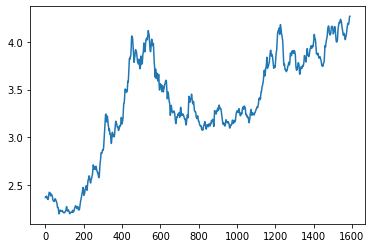

In [21]:
#Plotar filtrado pelo filtro gaussiano 5

saida_vetor_y = list()
for key, value in dicionario_g_5.items():
    saida_vetor_y.append(value)

# Retirando os primeiros e ultimos sinais (5 mod 2)
quant_sinais_exclui = len(g_5) % 2

if quant_sinais_exclui > 0:
    del(saida_vetor_y[:quant_sinais_exclui])
    del(saida_vetor_y[-quant_sinais_exclui])

x = list()
for valor in range(len(saida_vetor_y)):
    x.append(valor)

y = saida_vetor_y
    
plt.plot(x, y)

plt.show()

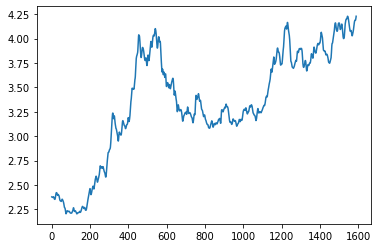

In [22]:
#Plotar filtrado pelo filtro gaussiano 5

saida_vetor_y = list()
for key, value in dicionario_g_11.items():
    saida_vetor_y.append(value)

# Retirando os primeiros e ultimos sinais (5 mod 2)
quant_sinais_exclui = len(g_11) % 2

if quant_sinais_exclui > 0:
    del(saida_vetor_y[:quant_sinais_exclui])
    del(saida_vetor_y[-quant_sinais_exclui])

x = list()
for valor in range(len(saida_vetor_y)):
    x.append(valor)

y = saida_vetor_y
    
plt.plot(x, y)

plt.show()

In [26]:
teste = list()
teste.append(2)

In [27]:
teste

[2]

In [29]:
teste = tuple()
teste = (1, 2, 3)


In [30]:
teste[0]

1